<a href="https://colab.research.google.com/github/fouakeu/ART-repo/blob/main/Projet_de_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation de la base de données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
pip install plotnine

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving Données_Conso_Stage_IA.xlsx to Données_Conso_Stage_IA (1).xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['Données_Conso_Stage_IA (1).xlsx']))
df

ID Consommateur  Âge   Sexe  \
0      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
1      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
2      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
3      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
4      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
...                                     ...  ...    ...   
80124  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80125  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80126  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80127  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80128  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   

      Catégorie de produit acheté  Prix du produit Date d'achat  Quantité  \
0                    Alimentation           541.85   2023-11-21         2   
1                    Électronique           854.76   2023-06-15         2   
2                    Alimentation           169.68   2024-04-05         3   
3                          Jouets            48.57   2023-08-03         4   
4                    Alimentation           252.11   2023-06-01         1   
...                           ...              ...          ...       ...   
80124                Alimentation           526.19   2023-10-08         4   
80125                Électronique           376.45   2023-05-02         1   
80126                   Vêtements           383.99   2023-12-25         1   
80127                      Jouets           482.81   2023-05-25         4   
80128                   Vêtements           658.98   2023-10-26         3   

      Canal d'achat  Engagement sur les réseaux sociaux  
0           Magasin                                  99  
1            Online                                  31  
2           Magasin                                  66  
3           Magasin                                  38  
4           Magasin                                  81  
...             ...                                 ...  
80124       Magasin                                  51  
80125        Online                                  10  
80126       Magasin                                  74  
80127        Online                                  92  
80128       Magasin                                  40  

[80129 rows x 9 columns]

In [ ]:
# Multiplier les deux colonnes
df['depense_totale'] = df['Prix du produit'] * df['Quantité']

df

ID Consommateur  Âge   Sexe  \
0      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
1      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
2      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
3      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
4      c0732317-563e-4f44-b87c-b25a0e4d8985   35  Femme   
...                                     ...  ...    ...   
80124  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80125  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80126  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80127  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   
80128  28d88910-3577-4da8-9967-60f00fe41337   42  Homme   

      Catégorie de produit acheté  Prix du produit Date d'achat  Quantité  \
0                    Alimentation           541.85   2023-11-21         2   
1                    Électronique           854.76   2023-06-15         2   
2                    Alimentation           169.68   2024-04-05         3   
3                          Jouets            48.57   2023-08-03         4   
4                    Alimentation           252.11   2023-06-01         1   
...                           ...              ...          ...       ...   
80124                Alimentation           526.19   2023-10-08         4   
80125                Électronique           376.45   2023-05-02         1   
80126                   Vêtements           383.99   2023-12-25         1   
80127                      Jouets           482.81   2023-05-25         4   
80128                   Vêtements           658.98   2023-10-26         3   

      Canal d'achat  Engagement sur les réseaux sociaux  depense_totale  
0           Magasin                                  99         1083.70  
1            Online                                  31         1709.52  
2           Magasin                                  66          509.04  
3           Magasin                                  38          194.28  
4           Magasin                                  81          252.11  
...             ...                                 ...             ...  
80124       Magasin                                  51         2104.76  
80125        Online                                  10          376.45  
80126       Magasin                                  74          383.99  
80127        Online                                  92         1931.24  
80128       Magasin                                  40         1976.94  

[80129 rows x 10 columns]

In [ ]:
print(df.columns)

Index(['ID Consommateur', 'Âge', 'Sexe', 'Catégorie de produit acheté',
       'Prix du produit', 'Date d'achat', 'Quantité', 'Canal d'achat',
       'Engagement sur les réseaux sociaux', 'depense_totale'],
      dtype='object')


In [ ]:
# Vérifiez si la colonne 'Date d_achat' est présente
if "Date d_achat" in df.columns:
    # Assurez-vous que la colonne 'Date d_achat' est au format datetime
    print("Vérification du format datetime :")
    print(df["Date d_achat"].head())

Vérification du format datetime :
0   2023-11-21
1   2023-06-15
2   2024-04-05
3   2023-08-03
4   2023-06-01
Name: Date d_achat, dtype: datetime64[ns]


In [ ]:
# Vérifiez si la colonne 'Date d_achat' est présente
if "Date d_achat" in df.columns:
    # Assurez-vous que la colonne 'Date d_achat' est au format datetime
    print("Vérification du format datetime :")
    print(df["Date d_achat"].head())

    # Extraction des caractéristiques temporelles
    df["Année"] = df["Date d_achat"].dt.year
    df["Mois"] = df["Date d_achat"].dt.month
    df["Jour"] = df["Date d_achat"].dt.day

    # Suppression de la colonne 'Date d_achat' si elle n'est plus nécessaire
    df.drop(columns=["Date d_achat"], inplace=True)

    # Sauvegarde du jeu de données transformé
    df.to_csv('donnees_transformees.csv', index=False)
else:
    print("La colonne 'Date d_achat' n'est pas trouvée dans le DataFrame.")

La colonne 'Date d_achat' n'est pas trouvée dans le DataFrame.


In [ ]:
df.head()

ID Consommateur  Âge  Sexe  Catégorie de produit acheté  Prix du produit  \
0             7482   35     0                            0           541.85   
1             7482   35     0                            4           854.76   
2             7482   35     0                            0           169.68   
3             7482   35     0                            1            48.57   
4             7482   35     0                            0           252.11   

  Date d'achat  Quantité  Canal d'achat  Engagement sur les réseaux sociaux  \
0   2023-11-21         2              0                                  99   
1   2023-06-15         2              1                                  31   
2   2024-04-05         3              0                                  66   
3   2023-08-03         4              0                                  38   
4   2023-06-01         1              0                                  81   

   depense_totale  
0         1083.70  
1         1709.52  
2          509.04  
3          194.28  
4          252.11

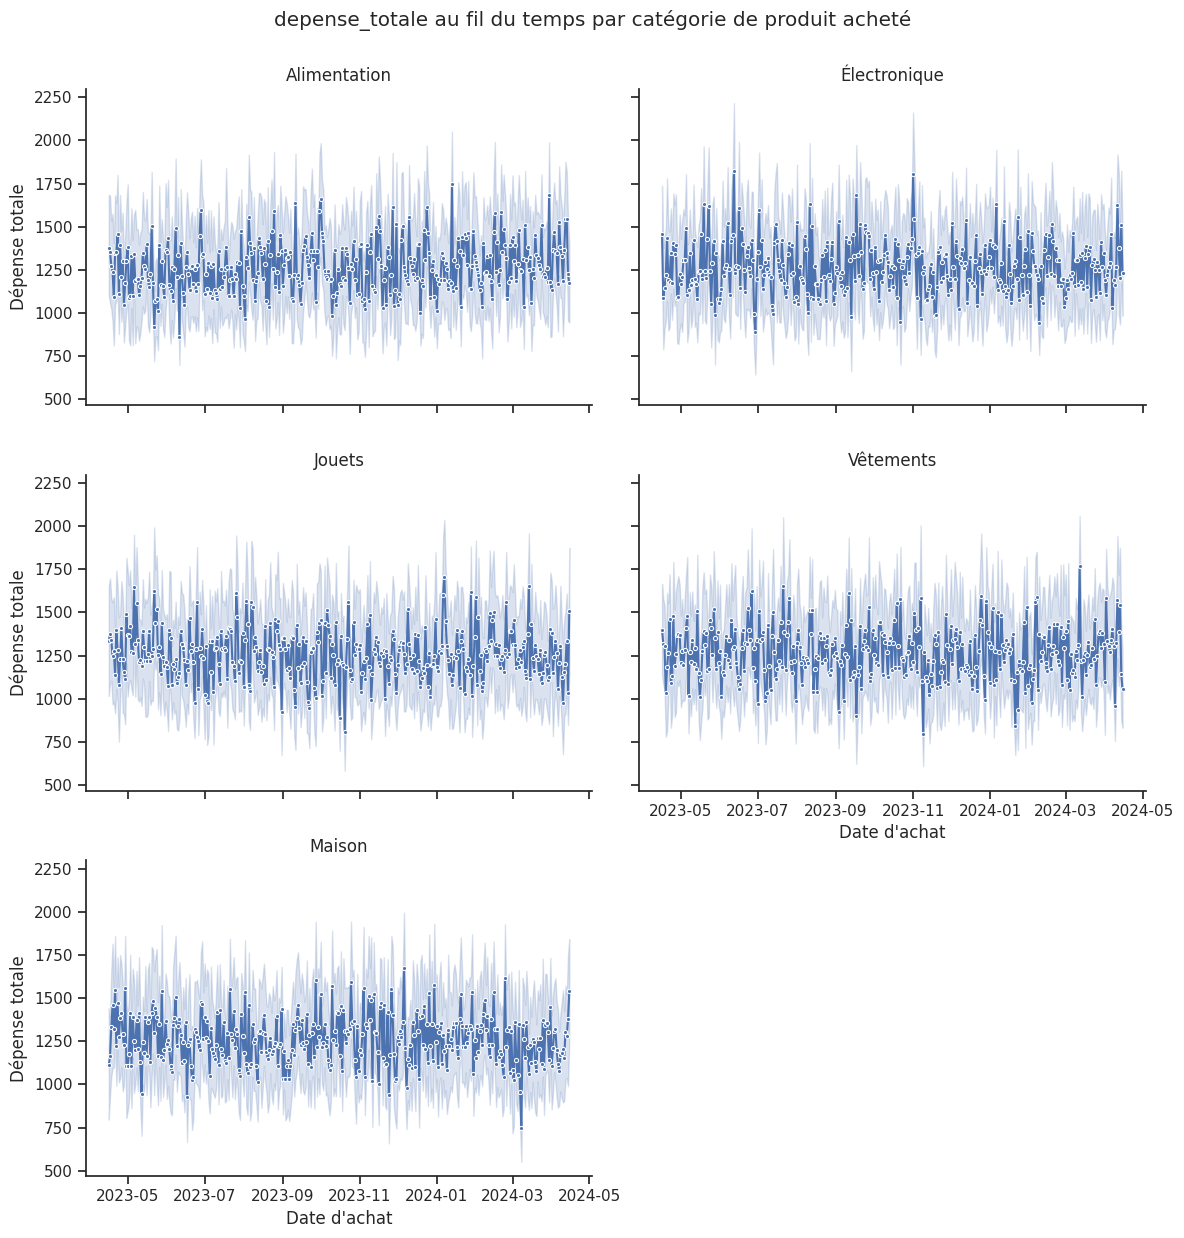

In [ ]:
# Pour facetter par catégorie de produit
sns.set(style="ticks")
g = sns.FacetGrid(df, col="Catégorie de produit acheté", col_wrap=2, height=4, aspect=1.5)
g = g.map(sns.lineplot, "Date d'achat", "depense_totale", marker=".")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date d'achat", "Dépense totale")
g.fig.suptitle('depense_totale au fil du temps par catégorie de produit acheté', y=1.03)

plt.show()

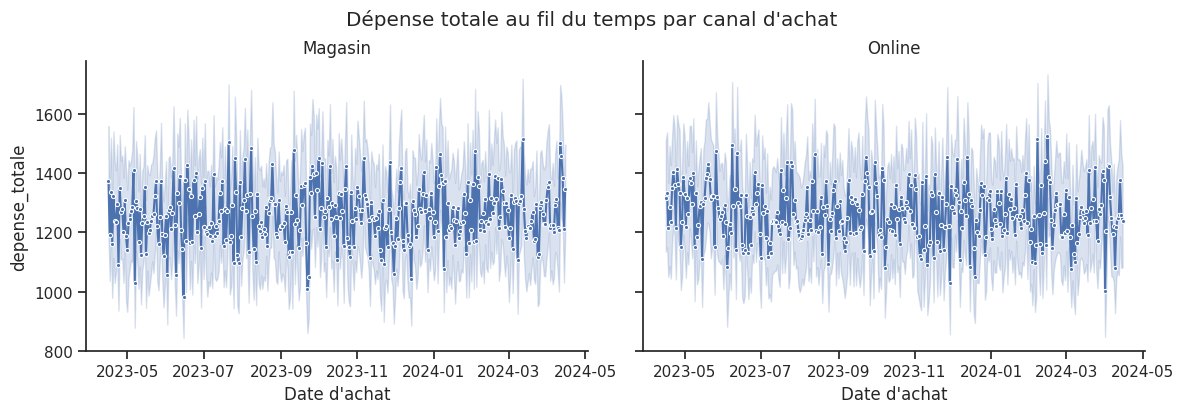

In [ ]:

# Facet Grid par canal d'achat
sns.set(style="ticks")
g_canal = sns.FacetGrid(df, col="Canal d'achat", height=4, aspect=1.5)
g_canal = g_canal.map(sns.lineplot, "Date d'achat", "depense_totale", marker=".")

g_canal.set_titles(col_template="{col_name}")
g_canal.set_axis_labels("Date d'achat", "depense_totale")
g_canal.fig.suptitle('Dépense totale au fil du temps par canal d\'achat', y=1.03)

plt.show()

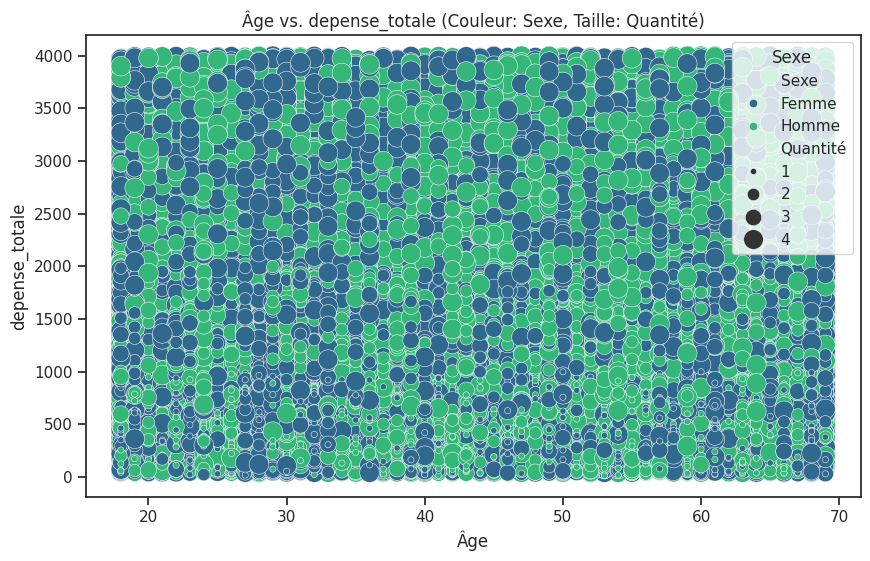

In [ ]:
# Scatter plot avec couleur représentant le sexe
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Âge', y='depense_totale', size='Quantité', hue='Sexe', palette='viridis', sizes=(20, 200))
plt.title('Âge vs. depense_totale (Couleur: Sexe, Taille: Quantité)')
plt.xlabel('Âge')
plt.ylabel('depense_totale')
plt.legend(loc='upper right', title='Sexe')
plt.show()

<ipython-input-14-b0a97f3ac09d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sexe', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')
<ipython-input-14-b0a97f3ac09d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sexe', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')


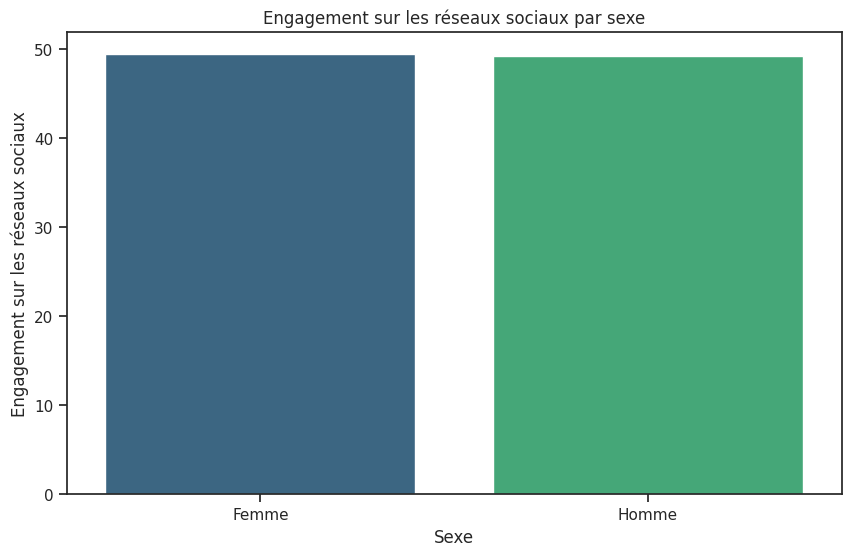

In [ ]:
# Bar plot pour comparer l'engagement sur les réseaux sociaux par sexe
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sexe', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')
plt.title('Engagement sur les réseaux sociaux par sexe')
plt.xlabel('Sexe')
plt.ylabel('Engagement sur les réseaux sociaux')
plt.show()

<ipython-input-16-519478eacb54>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Catégorie de produit acheté', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')
<ipython-input-16-519478eacb54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Catégorie de produit acheté', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')


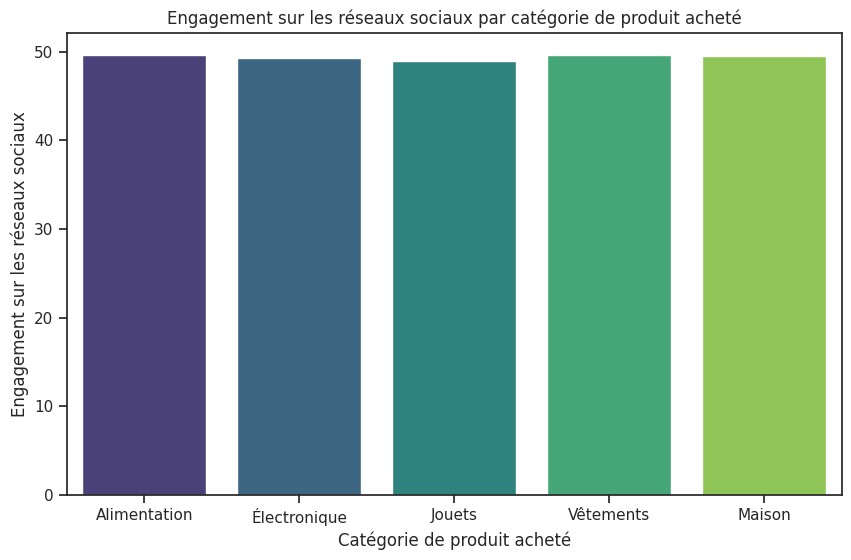

In [ ]:
# Bar plot pour comparer l'engagement sur les réseaux sociaux par catégorie de produit
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Catégorie de produit acheté', y='Engagement sur les réseaux sociaux', ci=None, palette='viridis')
plt.title('Engagement sur les réseaux sociaux par catégorie de produit acheté')
plt.xlabel('Catégorie de produit acheté')
plt.ylabel('Engagement sur les réseaux sociaux')
plt.show()

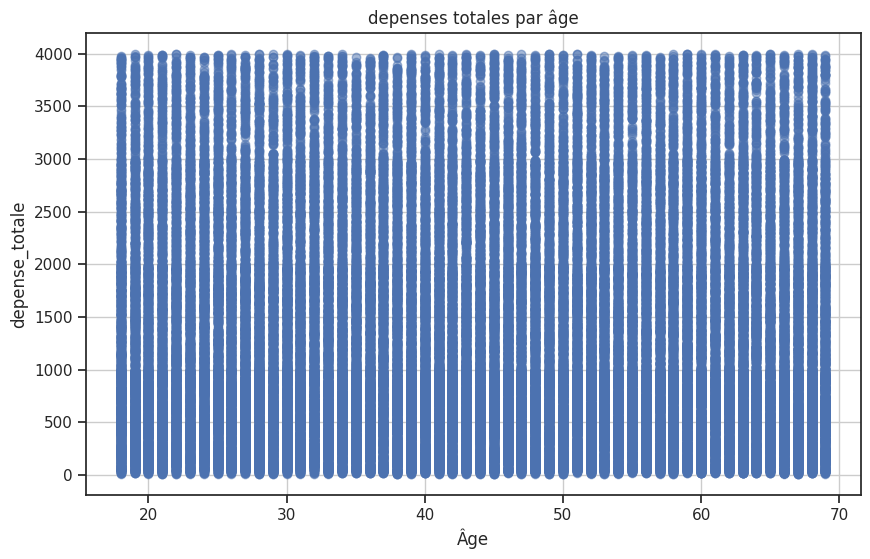

In [ ]:
# Scatter plot pour visualiser les dépenses totales par âge
plt.figure(figsize=(10, 6))
plt.scatter(df['Âge'], df['depense_totale'], alpha=0.5)
plt.title('depenses totales par âge')
plt.xlabel('Âge')
plt.ylabel('depense_totale')
plt.grid(True)
plt.show()

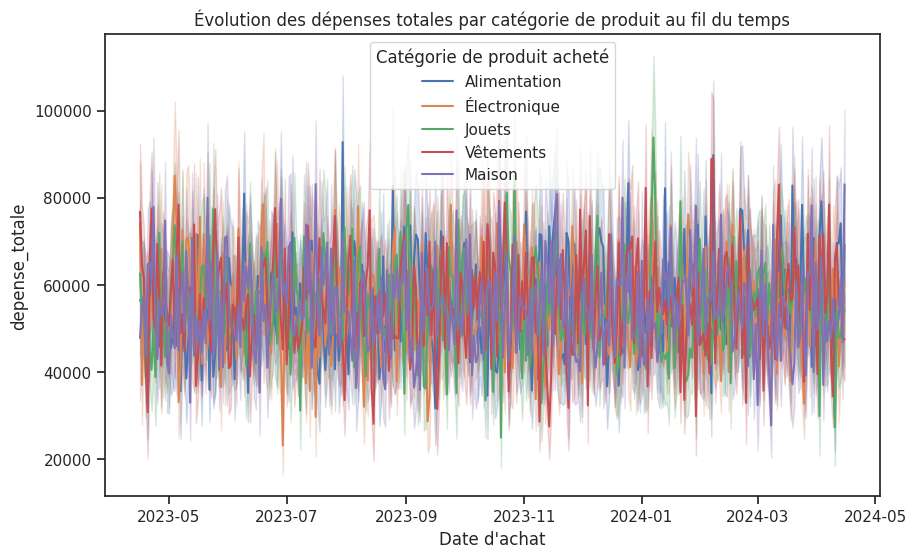

In [ ]:
# Line plot avec plusieurs courbes
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date d\'achat', y='depense_totale', hue='Catégorie de produit acheté', estimator='sum')
plt.title('Évolution des dépenses totales par catégorie de produit au fil du temps')
plt.xlabel('Date d\'achat')
plt.ylabel('depense_totale')
plt.legend(title='Catégorie de produit acheté')
plt.show()

Intervalles d'âge calculés :
[18.         19.18604651 20.37209302 21.55813953 22.74418605 23.93023256
 25.11627907 26.30232558 27.48837209 28.6744186  29.86046512 31.04651163
 32.23255814 33.41860465 34.60465116 35.79069767 36.97674419 38.1627907
 39.34883721 40.53488372 41.72093023 42.90697674 44.09302326 45.27906977
 46.46511628 47.65116279 48.8372093  50.02325581 51.20930233 52.39534884
 53.58139535 54.76744186 55.95348837 57.13953488 58.3255814  59.51162791
 60.69767442 61.88372093 63.06976744 64.25581395 65.44186047 66.62790698
 67.81395349 69.        ]

Calcul des dépenses par tranche d'âge :
Âge
(18.0, 19.186]      1754801.62
(19.186, 20.372]    1812859.75
(20.372, 21.558]    1819515.98
(21.558, 22.744]    1820218.35
(22.744, 23.93]     1741216.68
(23.93, 25.116]     4025379.57
(25.116, 26.302]    1874704.33
(26.302, 27.488]    2178340.56
(27.488, 28.674]    2006437.90
(28.674, 29.86]     1672450.53
(29.86, 31.047]     3902748.26
(31.047, 32.233]    1875167.55
(32.233, 33.419]  

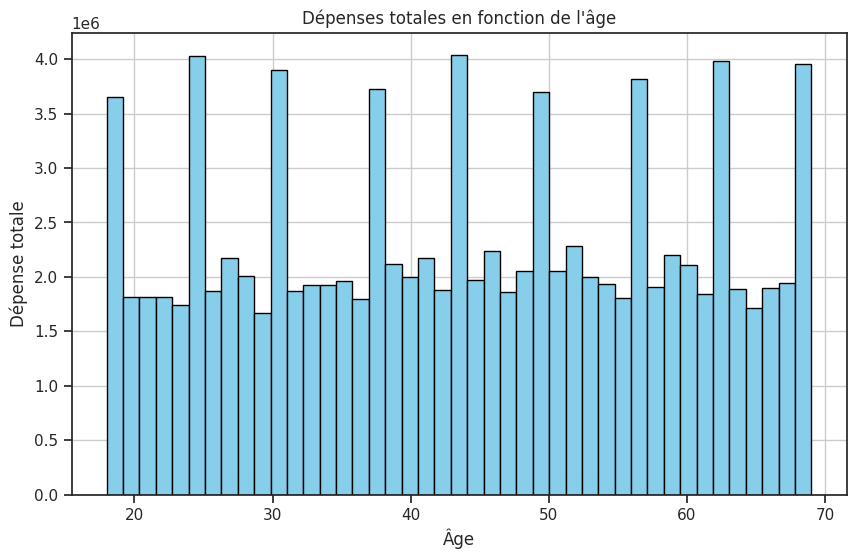

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer les intervalles d'âge de manière automatique
bins = np.histogram_bin_edges(df['Âge'], bins='auto')

# Afficher les intervalles d'âge calculés
print("Intervalles d'âge calculés :")
print(bins)

# Calculer la somme des dépenses totales pour chaque tranche d'âge
depenses_par_age = df.groupby(pd.cut(df['Âge'], bins=bins))['depense_totale'].sum()

# Afficher le calcul des dépenses par tranche d'âge
print("\nCalcul des dépenses par tranche d'âge :")
print(depenses_par_age)

# Créer l'histogramme des dépenses totales en fonction de l'âge
plt.figure(figsize=(10, 6))
plt.hist(df['Âge'], bins=bins, weights=df['depense_totale'], color='skyblue', edgecolor='black')
plt.title('Dépenses totales en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Dépense totale')
plt.grid(True)
plt.show()


Calcul des dépenses par tranche d'âge :
      tranche_age  depense_totale
0  (17.999, 26.5]     16748490.80
1    (26.5, 35.0]     17453945.50
2    (35.0, 43.5]     15662576.23
3    (43.5, 52.0]     18235928.39
4    (52.0, 60.5]     15783066.68
5    (60.5, 69.0]     17226377.95


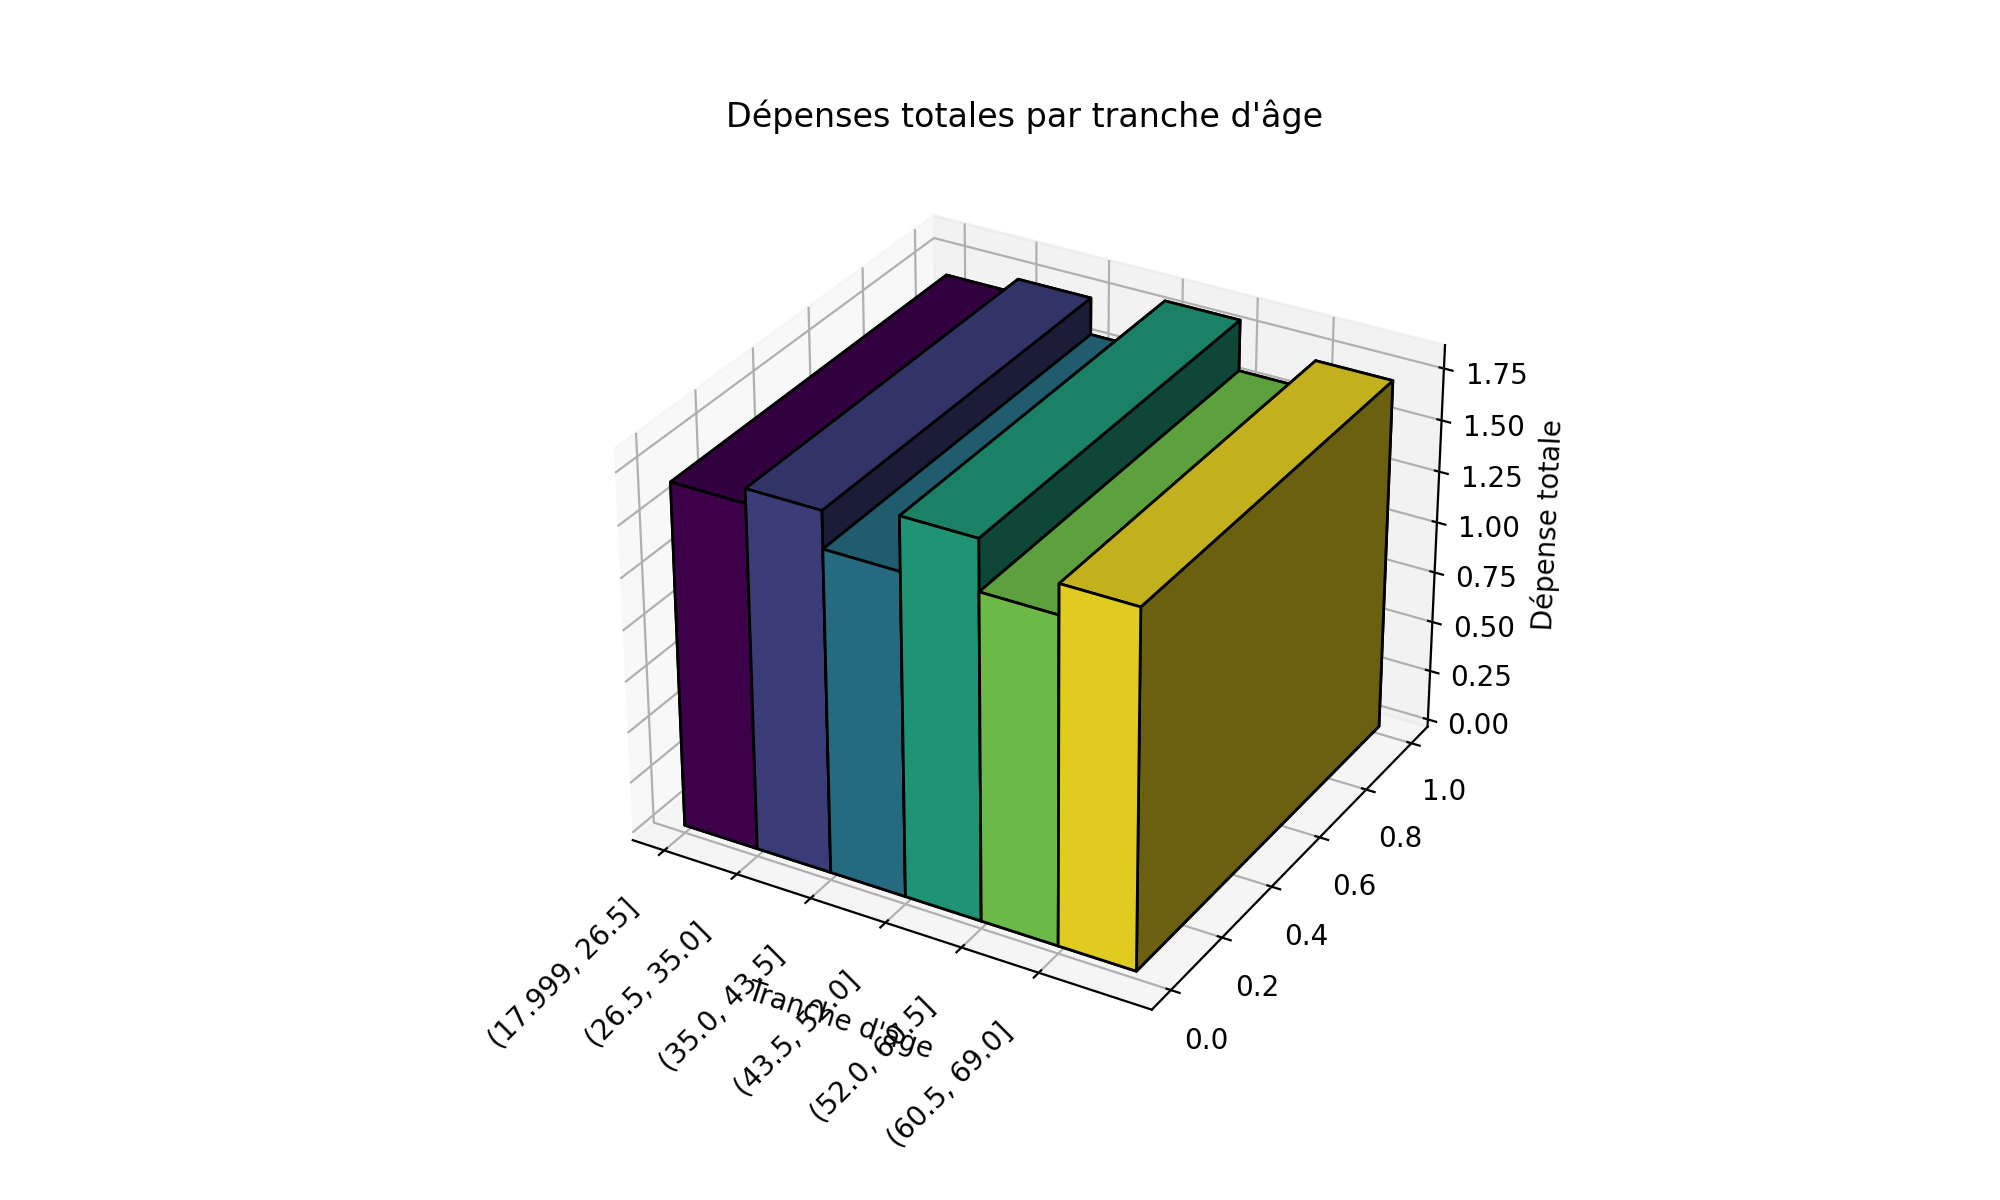

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que votre DataFrame df est déjà chargé

# Déterminer l'âge minimum et maximum dans vos données
age_min = df['Âge'].min()
age_max = df['Âge'].max()

# Définir le nombre d'intervalles souhaités
nombre_intervalles = 6

# Utiliser numpy.linspace pour générer des limites d'intervalles également espacées
intervalles = np.linspace(age_min, age_max, num=nombre_intervalles+1)

# Calculer la somme des dépenses totales pour chaque tranche d'âge
df['tranche_age'] = pd.cut(df['Âge'], bins=intervalles, include_lowest=True)
depenses_par_age = df.groupby('tranche_age')['depense_totale'].sum().reset_index()

# Afficher le calcul des dépenses par tranche d'âge
print("Calcul des dépenses par tranche d'âge :")
print(depenses_par_age)

# Préparer les données pour le graphique 3D
x = np.arange(len(depenses_par_age))
y = depenses_par_age['depense_totale']
z = np.zeros(len(depenses_par_age))  # base de la barre

# Définir une palette de couleurs
colors = plt.cm.viridis(np.linspace(0, 1, nombre_intervalles))

# Créer le graphique en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Ajouter les barres
for i in range(len(depenses_par_age)):
    ax.bar3d(x[i], z[i], z[i], 1, 1, y[i], color=colors[i], edgecolor='black')

# Définir les étiquettes et le titre
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel(' ')
ax.set_zlabel('Dépense totale')
ax.set_title('Dépenses totales par tranche d\'âge')

# Définir les étiquettes de l'axe X
ax.set_xticks(x)
ax.set_xticklabels(depenses_par_age['tranche_age'], rotation=45, ha='right')

plt.show()


Calcul des dépenses par tranche d'âge :
Âge
(18.0, 24.375]     10981146.48
(24.375, 30.75]    11691655.32
(30.75, 37.125]    13224806.14
(37.125, 43.5]     12067610.07
(43.5, 49.875]     12016108.97
(49.875, 56.25]    13997680.50
(56.25, 62.625]    11639031.23
(62.625, 69.0]     13592552.32
Name: depense_totale, dtype: float64


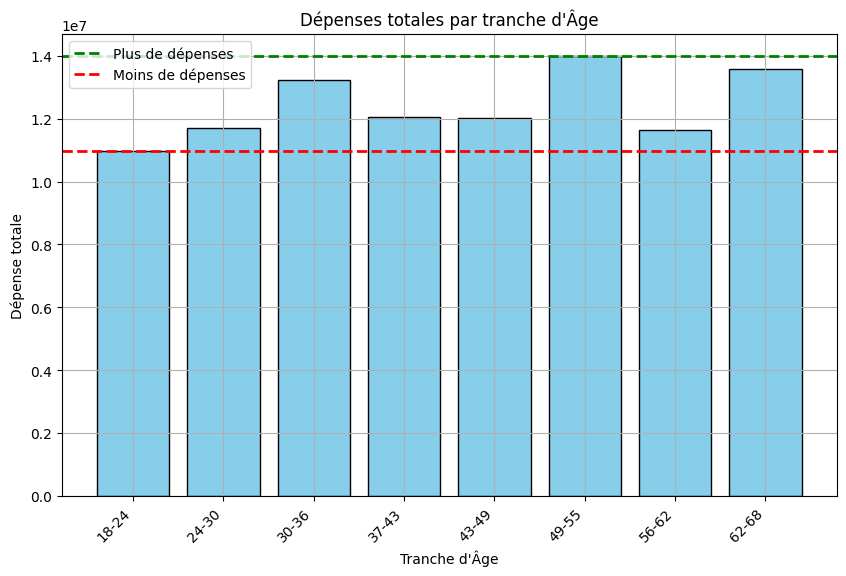

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Déterminer l'âge minimum et maximum dans vos données
age_min = df['Âge'].min()
age_max = df['Âge'].max()

# Définir le nombre d'intervalles souhaités
nombre_intervalles = 8

# Utiliser numpy.linspace pour générer des limites d'intervalles également espacées
intervalles = np.linspace(age_min, age_max, num=nombre_intervalles+1)

# Calculer la somme des dépenses totales pour chaque tranche d'âge
depenses_par_age = df.groupby(pd.cut(df['Âge'], bins=intervalles))['depense_totale'].sum()

# Afficher le calcul des dépenses par tranche d'âge
print("Calcul des dépenses par tranche d'âge :")
print(depenses_par_age)

# Extraire les limites des intervalles d'âge pour l'axe x
intervalles_labels = [f'{int(interval)}-{int(interval)+int(intervalles[1]-intervalles[0])}' for interval in intervalles[:-1]]

# Trouver la tranche d'âge qui dépense le plus et celle qui dépense le moins
age_max_depense = depenses_par_age.idxmax()
age_min_depense = depenses_par_age.idxmin()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(intervalles_labels, depenses_par_age, color='skyblue', edgecolor='black')
plt.title('Dépenses totales par tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Dépense totale')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Mettre en évidence la tranche d'âge qui dépense le plus et celle qui dépense le moins
plt.axhline(y=depenses_par_age[age_max_depense], color='green', linestyle='--', linewidth=2, label='Plus de dépenses')
plt.axhline(y=depenses_par_age[age_min_depense], color='red', linestyle='--', linewidth=2, label='Moins de dépenses')
plt.legend()

plt.show()


Calcul des dépenses par tranche d'Âge :
Âge
(17.999, 26.5]    16748490.80
(26.5, 35.0]      17453945.50
(35.0, 43.5]      15662576.23
(43.5, 52.0]      18235928.39
(52.0, 60.5]      15783066.68
(60.5, 69.0]      17226377.95
Name: depense_totale, dtype: float64


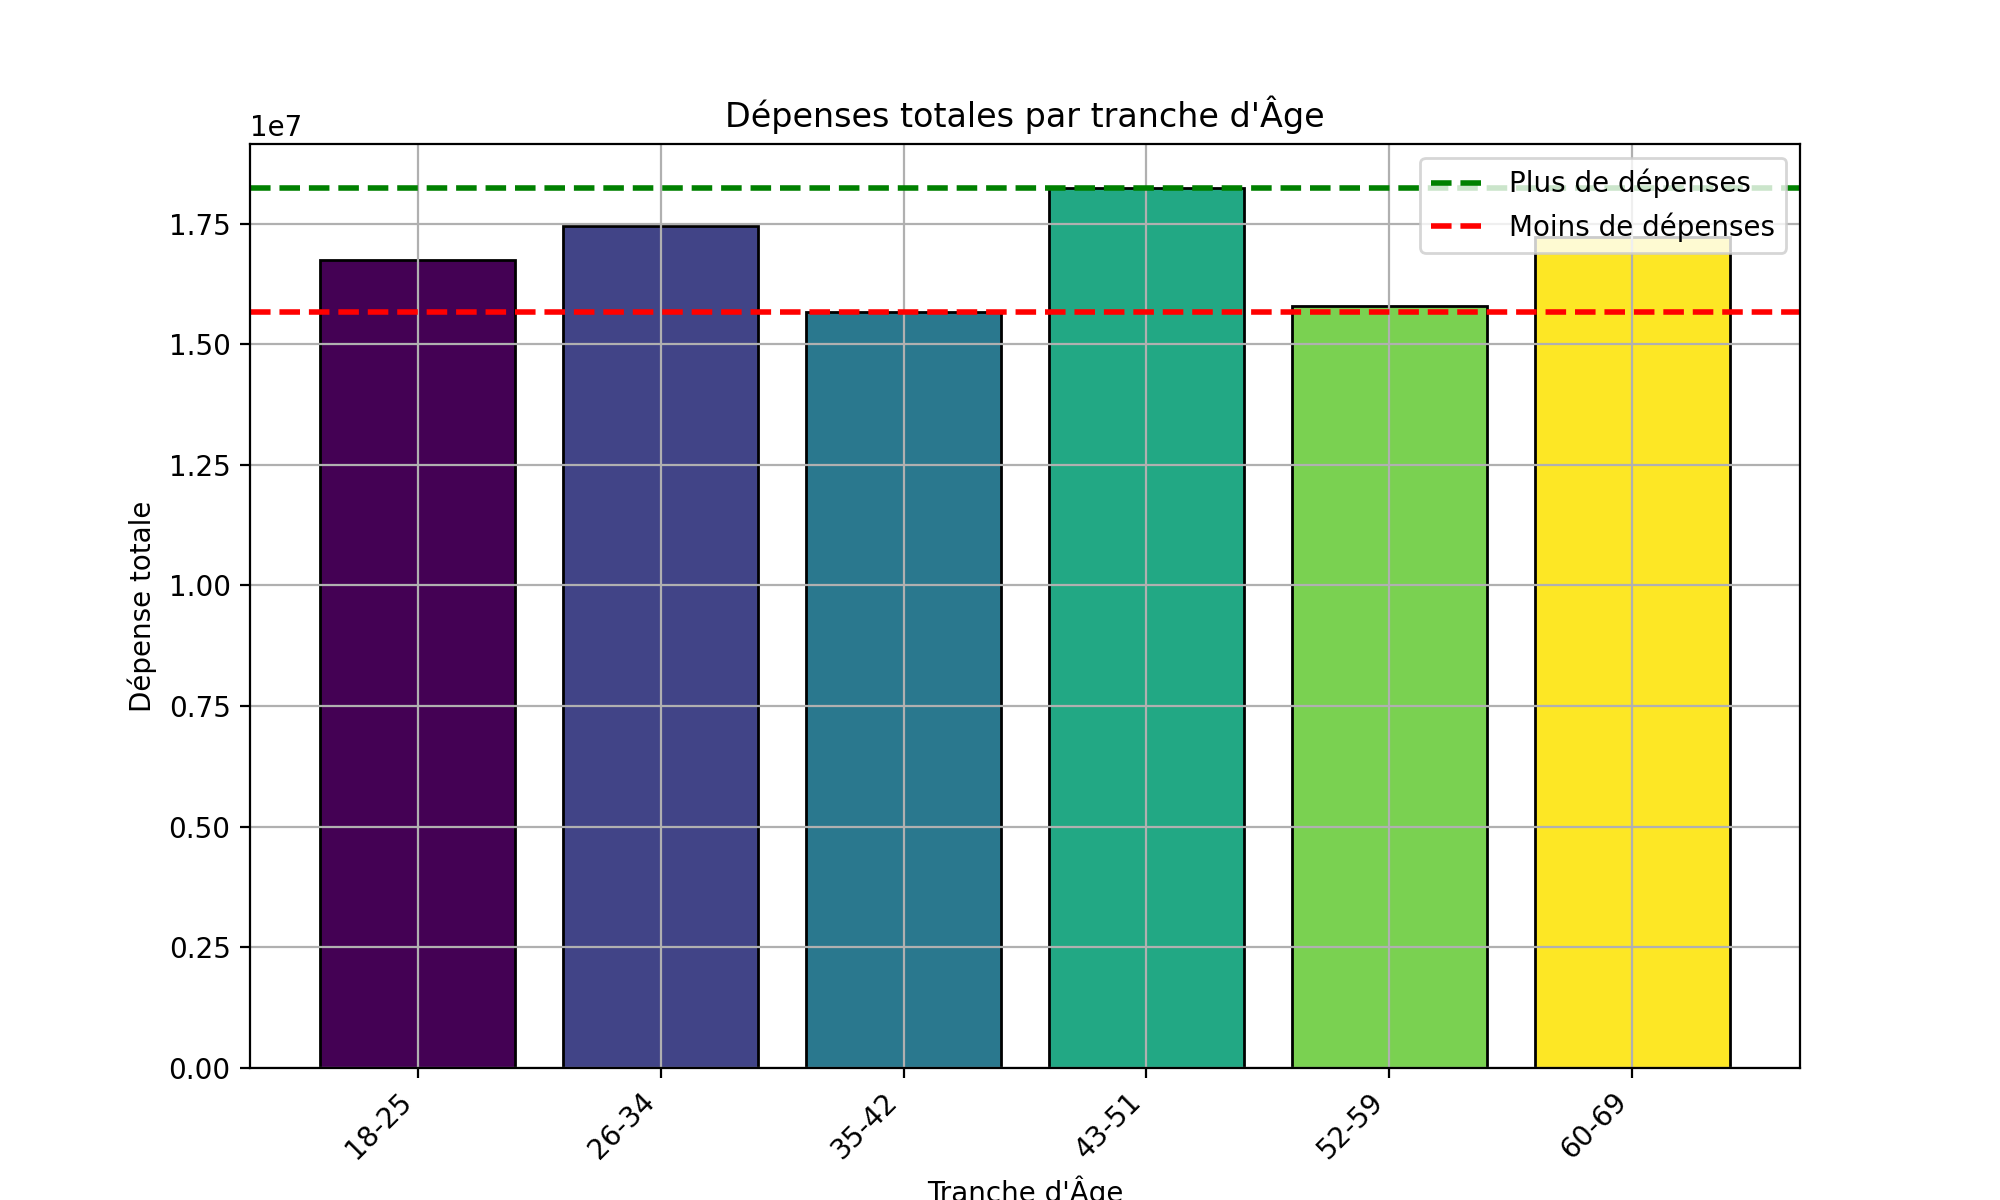

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger vos données dans un DataFrame (supposons que df soit déjà chargé)
# Exemple: df = pd.read_csv('votre_fichier.csv')

# Déterminer l'âge minimum et maximum dans vos données
age_min = df['Âge'].min()
age_max = df['Âge'].max()

# Définir le nombre d'intervalles souhaités
nombre_intervalles = 6

# Utiliser numpy.linspace pour générer des limites d'intervalles également espacées
intervalles = np.linspace(age_min, age_max, num=nombre_intervalles+1)

# Calculer la somme des dépenses totales pour chaque tranche d'âge
depenses_par_age = df.groupby(pd.cut(df['Âge'], bins=intervalles, include_lowest=True))['depense_totale'].sum()

# Afficher le calcul des dépenses par tranche d'âge
print("Calcul des dépenses par tranche d'Âge :")
print(depenses_par_age)

# Extraire les limites des intervalles d'âge pour l'axe x
intervalles_labels = [f'{int(intervalles[i])}-{int(intervalles[i+1]-1)}' for i in range(len(intervalles)-1)]

# Correction de l'étiquette de la dernière tranche pour inclure l'âge maximal
intervalles_labels[-1] = f'{int(intervalles[-2])}-{int(intervalles[-1])}'

# Trouver la tranche d'âge qui dépense le plus et celle qui dépense le moins
age_max_depense = depenses_par_age.idxmax()
age_min_depense = depenses_par_age.idxmin()

# Créer le diagramme à barres avec des couleurs différentes pour chaque tranche d'âge
colors = plt.cm.viridis(np.linspace(0, 1, nombre_intervalles))

plt.figure(figsize=(10, 6))
bars = plt.bar(intervalles_labels, depenses_par_age, color=colors, edgecolor='black')
plt.title('Dépenses totales par tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Dépense totale')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Mettre en évidence la tranche d'âge qui dépense le plus et celle qui dépense le moins
plt.axhline(y=depenses_par_age[age_max_depense], color='green', linestyle='--', linewidth=2, label='Plus de dépenses')
plt.axhline(y=depenses_par_age[age_min_depense], color='red', linestyle='--', linewidth=2, label='Moins de dépenses')
plt.legend()

plt.show()


Calcul des dépenses par tranche d'âge :
Âge
(17.999, 26.5]    16748490.80
(26.5, 35.0]      17453945.50
(35.0, 43.5]      15662576.23
(43.5, 52.0]      18235928.39
(52.0, 60.5]      15783066.68
(60.5, 69.0]      17226377.95
Name: depense_totale, dtype: float64


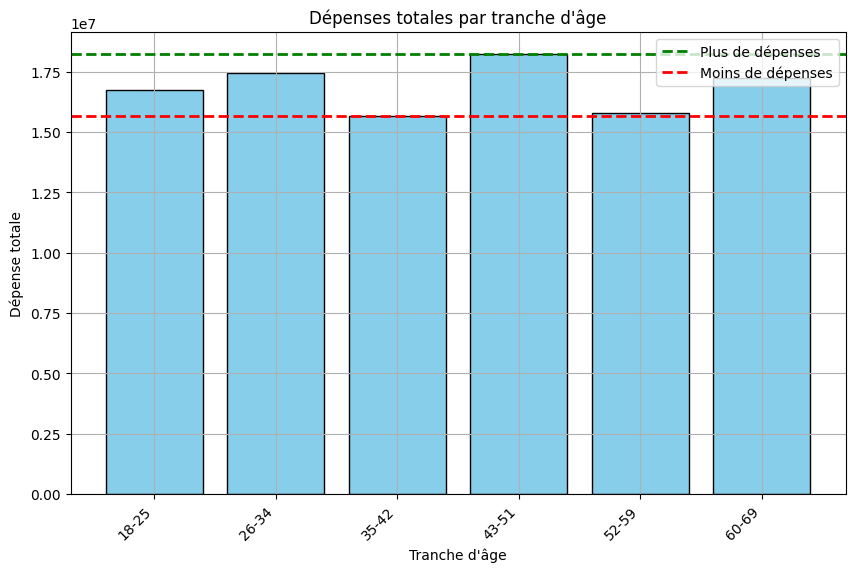

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger vos données dans un DataFrame (supposons que df soit déjà chargé)
# Exemple: df = pd.read_csv('votre_fichier.csv')

# Déterminer l'âge minimum et maximum dans vos données
age_min = df['Âge'].min()
age_max = df['Âge'].max()

# Définir le nombre d'intervalles souhaités
nombre_intervalles = 6

# Utiliser numpy.linspace pour générer des limites d'intervalles également espacées
intervalles = np.linspace(age_min, age_max, num=nombre_intervalles+1)

# Calculer la somme des dépenses totales pour chaque tranche d'âge
depenses_par_age = df.groupby(pd.cut(df['Âge'], bins=intervalles, include_lowest=True))['depense_totale'].sum()

# Afficher le calcul des dépenses par tranche d'âge
print("Calcul des dépenses par tranche d'âge :")
print(depenses_par_age)

# Extraire les limites des intervalles d'âge pour l'axe x
intervalles_labels = [f'{int(intervalles[i])}-{int(intervalles[i+1]-1)}' for i in range(len(intervalles)-1)]

# Correction de l'étiquette de la dernière tranche pour inclure l'âge maximal
intervalles_labels[-1] = f'{int(intervalles[-2])}-{int(intervalles[-1])}'

# Trouver la tranche d'âge qui dépense le plus et celle qui dépense le moins
age_max_depense = depenses_par_age.idxmax()
age_min_depense = depenses_par_age.idxmin()

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(intervalles_labels, depenses_par_age, color='skyblue', edgecolor='black')
plt.title('Dépenses totales par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Dépense totale')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Mettre en évidence la tranche d'âge qui dépense le plus et celle qui dépense le moins
plt.axhline(y=depenses_par_age[age_max_depense], color='green', linestyle='--', linewidth=2, label='Plus de dépenses')
plt.axhline(y=depenses_par_age[age_min_depense], color='red', linestyle='--', linewidth=2, label='Moins de dépenses')
plt.legend()

plt.show()


# Informations sur la base de données

In [ ]:
# Afficher les premières lignes du dataset pour comprendre sa structure
#df.head()

# Assurez-vous que la colonne de date est bien au format datetime
#df["Date d'achat"] = pd.to_datetime(df["Date d'achat"])

# Ajouter une colonne année-mois pour faciliter le regroupement
#df['year_month'] = df["Date d'achat"].dt.to_period('M')

# Regrouper par cette nouvelle colonne et calculer la somme des consommations
#monthly_consumption = df.groupby('year_month')['Quantité'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
#monthly_consumption.columns = ['year_month', 'monthly_consumption']

# Afficher le résultat
#monthly_consumption

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#scale = LabelEncoder()

In [ ]:
#for i in df1.describe(include = 'O'):
    #df1[i] = scale.fit_transform(df1[i])

# Etudions la liaison entre une variable quantitative et une variable qualitative

**Boite à moustache**

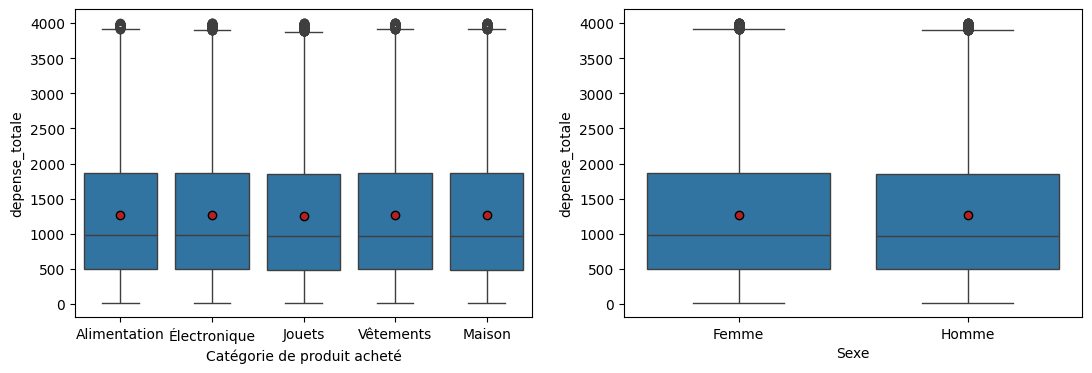

In [ ]:
#La boite à moustaches (boxplot)
#Une boîte à moustaches est un graphique qui nous permet de résumer l’information qui est contenu dans une variable quantitative à l’aide de cinq indicateur statistique ( minimum, premier quartile, médiane, troisième quartile, maximum ). On représente donc une boite à moustache pour chaque groupe en vue de détecter une différence significative.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
sns.boxplot(x='Catégorie de produit acheté', y='depense_totale', data=df, showmeans=True, meanprops=meanprops)

plt.subplot(1, 2, 2)
sns.boxplot(x='Sexe', y='depense_totale', data=df, showmeans=True, meanprops=meanprops)

plt.show()

**L’histogramme**

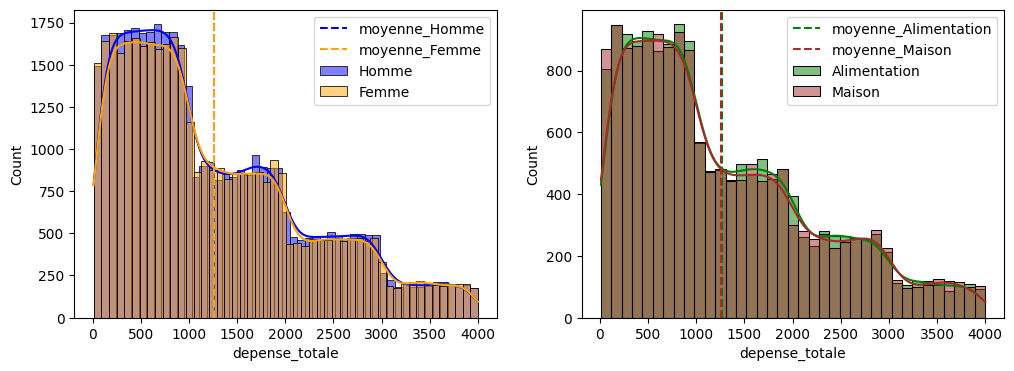

In [ ]:
Homme = df[df['Sexe'] == 'Homme']
Femme = df[df['Sexe'] == 'Femme']
Alimentation = df[df['Catégorie de produit acheté'] == 'Alimentation']
Maison = df[df['Catégorie de produit acheté'] == 'Maison']

plt.figure(figsize=(12, 4))

# Premier sous-tracé
plt.subplot(1, 2, 1)
sns.histplot(Homme['depense_totale'], label='Homme', kde=True, color='blue')
plt.axvline(x=np.mean(Homme['depense_totale']), label='moyenne_Homme', color='blue', linestyle='--')
sns.histplot(Femme['depense_totale'], label='Femme', kde=True, color='orange')
plt.axvline(x=np.mean(Femme['depense_totale']), label='moyenne_Femme', color='orange', linestyle='--')
plt.legend()

# Deuxième sous-tracé
plt.subplot(1, 2, 2)
sns.histplot(Alimentation['depense_totale'], label='Alimentation', kde=True, color='green')
plt.axvline(x=np.mean(Alimentation['depense_totale']), label='moyenne_Alimentation', color='green', linestyle='--')
sns.histplot(Maison['depense_totale'], label='Maison', kde=True, color='brown')
plt.axvline(x=np.mean(Maison['depense_totale']), label='moyenne_Maison', color='brown', linestyle='--')
plt.legend()

plt.show()

# Approche des indicateurs statistiques

# Tests **Statistiques**

**Test de Student**

In [ ]:
import scipy.stats as stats
student_t,student_pvalue = stats.ttest_ind(Homme.depense_totale,Femme.depense_totale)
welch_t,welch_pvalue = stats.ttest_ind(Homme.depense_totale,Femme.depense_totale,equal_var=False)
man_withney_t,man_withney_pvalue = stats.mannwhitneyu(Femme.depense_totale,Homme.depense_totale)
print(f'Student test : statistique = {student_t} ; pvalue = {student_pvalue} \nWelch test : statistique = {welch_t} ; pvalue = {welch_pvalue} \nMan-Withney test : statistique = {man_withney_t} ; pvalue = {man_withney_pvalue}')

Student test : statistique = -0.4225209802347457 ; pvalue = 0.6726459240802245 
Welch test : statistique = -0.4224930421903016 ; pvalue = 0.672666314484172 
Man-Withney test : statistique = 803395967.0 ; pvalue = 0.7103130177301438


Test de Student (test t pour échantillons indépendants) :

Statistique t : -0.4225209802347457
p-value : 0.6726459240802245

Interprétation : La statistique t est très proche de zéro, ce qui indique qu'il n'y a pas de différence significative entre les moyennes des dépenses totales des hommes et des femmes. La p-value est de 0.6726, bien au-dessus du seuil commun de 0.05, ce qui signifie qu'on ne peut pas rejeter l'hypothèse nulle selon laquelle les moyennes des deux groupes sont égales.

**Test ANOVA (Analyse of variance ou Analyse de variance)**

In [ ]:
anova_t, anova_pvalue = stats.f_oneway(Alimentation["depense_totale"], Maison["depense_totale"])
kruskal_t, kruskal_pvalue = stats.kruskal(Alimentation["depense_totale"], Maison["depense_totale"])
print(f'Anova test : statistic = {anova_t} ; pvalue = {anova_pvalue} \nKruskal-Wallis test : statistic = {kruskal_t} ; pvalue = {kruskal_pvalue}')

Anova test : statistic = 0.23837189124539584 ; pvalue = 0.6253878443110479 
Kruskal-Wallis test : statistic = 0.7634502303695397 ; pvalue = 0.3822509340478304


test ANOVA (analyse de la variance) :

Statistique F : 0.23837189124539584
p-value : 0.6253878443110479
Interprétation : La statistique F est faible, ce qui indique que la variance entre les groupes "Alimentation" et "Maison" par rapport à la variance au sein des groupes n'est pas très grande. La p-value de 0.6254 est bien au-dessus du seuil commun de 0.05, ce qui signifie qu'on ne peut pas rejeter l'hypothèse nulle selon laquelle les moyennes des dépenses totales des deux catégories sont égales. Il n'y a pas de différence statistiquement significative entre les dépenses totales pour l'alimentation et la maison.


In [ ]:
#Test ANOVA1

# Extract age groups
groupes = []
for age in df1['Âge'].unique():
    groupes.append(df1[df1['Âge'] == age]['Sexe'])

# Perform one-way ANOVA
anova_result = f_oneway(*groupes)

# Print the results
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

#Test ANOVA2

# Extract age groups
groupes = []
for Prix_du_produit in df1['Prix du produit'].unique():
    groupes.append(df1[df1['Prix du produit'] == Prix_du_produit]['Catégorie de produit acheté'])
# Perform one-way ANOVA
anova_result = f_oneway(*groupes)

# Print the results
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

F-statistic: 13.217757244880108, p-value: 4.1540374280921295e-109
F-statistic: 1.0139344186314143, p-value: 0.09968712017876186


 Test ANOVA1

la statistique F élevée associée à une valeur p très faible indique qu'il existe probablement des différences significatives entre les moyennes des groupes d'âge en ce qui concerne la variable "Sexe". En d'autres termes, le sexe semble avoir un effet significatif sur les différentes tranches d'âge.

Test ANOVA2

Le résultat de ce test ANOVA indique qu'il n'y a pas de différences significatives entre les moyennes des différentes catégories de produits en ce qui concerne le prix du produit. En d'autres termes, le prix du produit ne semble pas avoir un effet significatif sur les différentes catégories de produits achetés, du moins dans le contexte de cette analyse. La valeur de p élevée (0.0997) indique qu'il y a une probabilité relativement élevée que les différences observées entre les moyennes des groupes soient simplement le résultat du hasard.








Approche des indicateurs statistiques

In [ ]:
from scipy.stats import chi2_contingency

# Effectuer le test du chi-deux pour tester l'indépendance entre 'Sexe' et 'Catégorie de produit acheté'
contingency_table = pd.crosstab(df['Sexe'], df['Catégorie de produit acheté'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique de test du Chi-carré :", chi2_stat)
print("P-valeur :", p_val)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Statistique de test du Chi-carré : 5.562155270699739
P-valeur : 0.23431976540622457
Degrés de liberté : 4
Fréquences attendues : [[7872.80270564 7796.05925445 7781.88371251 7879.15725892 7838.09706848]
 [8233.19729436 8152.94074555 8138.11628749 8239.84274108 8196.90293152]]


In [ ]:
#Le rapport de corrélation

def rapport_corr(x, y):
    '''x est une variable qualitative
    y est une variable quantitative
    '''
    somme = 0
    for facteur in x.value_counts().index:
        ind = x[x == facteur].dropna(axis=0).index
        classe = y.iloc[ind,]
        somme = somme + len(classe) * np.sum((np.mean(classe) - np.mean(y))**2)
    y_ecart = np.sum((y - np.mean(y))**2)
    rc = somme / y_ecart
    return rc

rapport_corr(df['Sexe'], df['depense_totale'])
#rapport_corr(df['Catégorie de produit acheté'], df['depense_totale'])


2.2280077999390136e-06

Cette valeur est extrêmement proche de zéro, ce qui indique qu'il n'y a pratiquement aucune relation entre la catégorie de produit acheté et les dépenses totales. En d'autres termes, la catégorie de produit acheté ne semble pas influencer de manière significative les dépenses totales.

In [ ]:
#Le rapport de corrélation

def rapport_corr(x, y):
    '''x est une variable qualitative
    y est une variable quantitative
    '''
    somme = 0
    for facteur in x.value_counts().index:
        ind = x[x == facteur].dropna(axis=0).index
        classe = y.iloc[ind,]
        somme = somme + len(classe) * np.sum((np.mean(classe) - np.mean(y))**2)
    y_ecart = np.sum((y - np.mean(y))**2)
    rc = somme / y_ecart
    return rc

rapport_corr(df['ID Consommateur'], df['depense_totale'])
#rapport_corr(df['Canal d\'achat'], df['depense_totale'])

0.12565730471921038

Avec une corrélation de 12,5% les variables ID Consommateur et depense totale ne sont pas liées. les variables canal d'achat et monthly_consumption qui ont une corrélation de 0,00000126% ne sont pas aussi liées.

**Verifions si La distribution est-elle normale texte en gras**

Plus la courbe est rectiligne, plus cela signifie que les quantiles de la variable sont similaires à ceux de la distribution attendue

**Verification** des valeurs manquantes sur la abse de données

In [ ]:
df.isnull().sum().sort_values(ascending = False)

ID Consommateur                       0
Âge                                   0
Sexe                                  0
Catégorie de produit acheté           0
Prix du produit                       0
Date d'achat                          0
Quantité                              0
Canal d'achat                         0
Engagement sur les réseaux sociaux    0
depense_totale                        0
dtype: int64

**Analyse** exploratoire  de notre base de données

In [ ]:
df.describe()

ID Consommateur           Âge          Sexe  \
count     80129.000000  80129.000000  80129.000000   
mean       5005.890327     43.721911      0.511188   
min           0.000000     18.000000      0.000000   
25%        2517.000000     31.000000      0.000000   
50%        4990.000000     44.000000      1.000000   
75%        7508.000000     57.000000      1.000000   
max        9999.000000     69.000000      1.000000   
std        2880.962210     14.887216      0.499878   

       Catégorie de produit acheté  Prix du produit  \
count                 80129.000000     80129.000000   
mean                      2.000349       504.752450   
min                       0.000000        10.030000   
25%                       1.000000       257.030000   
50%                       2.000000       506.740000   
75%                       3.000000       751.200000   
max                       4.000000       999.990000   
std                       1.415872       285.295982   

                        Date d'achat      Quantité  Canal d'achat  \
count                          80129  80129.000000   80129.000000   
mean   2023-10-15 15:52:54.805625600      2.498521       0.499332   
min              2023-04-16 00:00:00      1.000000       0.000000   
25%              2023-07-16 00:00:00      1.000000       0.000000   
50%              2023-10-16 00:00:00      3.000000       0.000000   
75%              2024-01-16 00:00:00      3.000000       1.000000   
max              2024-04-15 00:00:00      4.000000       1.000000   
std                              NaN      1.117286       0.500003   

       Engagement sur les réseaux sociaux  depense_totale  
count                        80129.000000    80129.000000  
mean                            49.386951     1261.845094  
min                              0.000000       10.060000  
25%                             24.000000      493.350000  
50%                             49.000000      971.720000  
75%                             74.000000     1859.370000  
max                             99.000000     3999.560000  
std                             28.866552      962.829898

In [ ]:
from sklearn.preprocessing import LabelEncoder

scale = LabelEncoder()

In [ ]:
for i in df.describe(include = 'O'):
    df[i] = scale.fit_transform(df[i])

In [ ]:
df

ID Consommateur  Âge  Sexe  Catégorie de produit acheté  \
0                 7482   35     0                            0   
1                 7482   35     0                            4   
2                 7482   35     0                            0   
3                 7482   35     0                            1   
4                 7482   35     0                            0   
...                ...  ...   ...                          ...   
80124             1518   42     1                            0   
80125             1518   42     1                            4   
80126             1518   42     1                            3   
80127             1518   42     1                            1   
80128             1518   42     1                            3   

       Prix du produit Date d'achat  Quantité  Canal d'achat  \
0               541.85   2023-11-21         2              0   
1               854.76   2023-06-15         2              1   
2               169.68   2024-04-05         3              0   
3                48.57   2023-08-03         4              0   
4               252.11   2023-06-01         1              0   
...                ...          ...       ...            ...   
80124           526.19   2023-10-08         4              0   
80125           376.45   2023-05-02         1              1   
80126           383.99   2023-12-25         1              0   
80127           482.81   2023-05-25         4              1   
80128           658.98   2023-10-26         3              0   

       Engagement sur les réseaux sociaux  depense_totale  
0                                      99         1083.70  
1                                      31         1709.52  
2                                      66          509.04  
3                                      38          194.28  
4                                      81          252.11  
...                                   ...             ...  
80124                                  51         2104.76  
80125                                  10          376.45  
80126                                  74          383.99  
80127                                  92         1931.24  
80128                                  40         1976.94  

[80129 rows x 10 columns]

In [ ]:
x = df.drop(['Prix du produit','ID Consommateur','Quantité'],axis = 1)

In [ ]:
x

Âge  Sexe  Catégorie de produit acheté Date d'achat  Canal d'achat  \
0       35     0                            0   2023-11-21              0   
1       35     0                            4   2023-06-15              1   
2       35     0                            0   2024-04-05              0   
3       35     0                            1   2023-08-03              0   
4       35     0                            0   2023-06-01              0   
...    ...   ...                          ...          ...            ...   
80124   42     1                            0   2023-10-08              0   
80125   42     1                            4   2023-05-02              1   
80126   42     1                            3   2023-12-25              0   
80127   42     1                            1   2023-05-25              1   
80128   42     1                            3   2023-10-26              0   

       Engagement sur les réseaux sociaux  depense_totale  
0                                      99         1083.70  
1                                      31         1709.52  
2                                      66          509.04  
3                                      38          194.28  
4                                      81          252.11  
...                                   ...             ...  
80124                                  51         2104.76  
80125                                  10          376.45  
80126                                  74          383.99  
80127                                  92         1931.24  
80128                                  40         1976.94  

[80129 rows x 7 columns]

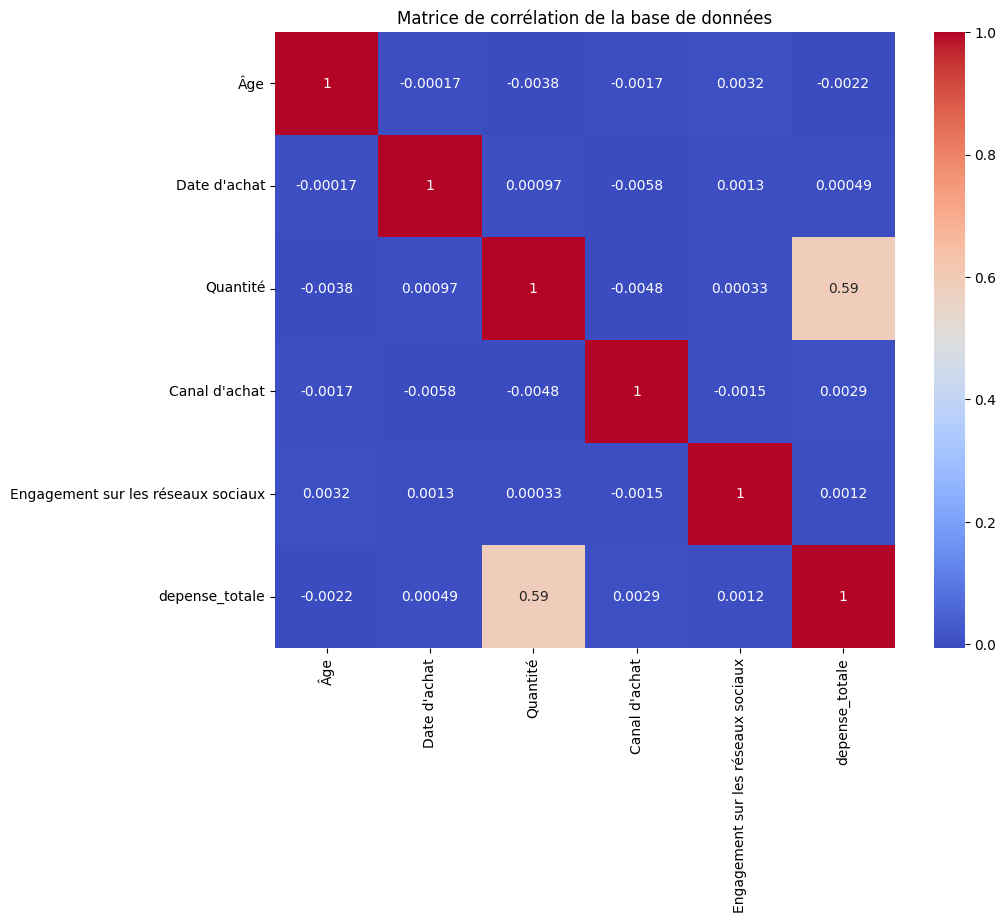

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = x.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure selon votre préférence
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de la base de données')
plt.show()

**Description de la bse de données des valeurs Catégoriques**

In [ ]:
df.describe(include = 'O')

ID Consommateur   Sexe  \
count                                  80129  80129   
unique                                 10000      2   
top     7fbc57cf-e646-4309-ae5c-bda78440647c  Homme   
freq                                      15  40961   

       Catégorie de produit acheté Canal d'achat  
count                        80129         80129  
unique                           5             2  
top                      Vêtements       Magasin  
freq                         16119         40118

**determinons** la taille excate de notre base de données

In [ ]:
df.shape

(80129, 10)

# Representations graphiques de plussieur variable d'un dataset

Diagramme en nuage de points (Scatter plot) :

Utile pour visualiser la relation entre deux variables quantitatives.

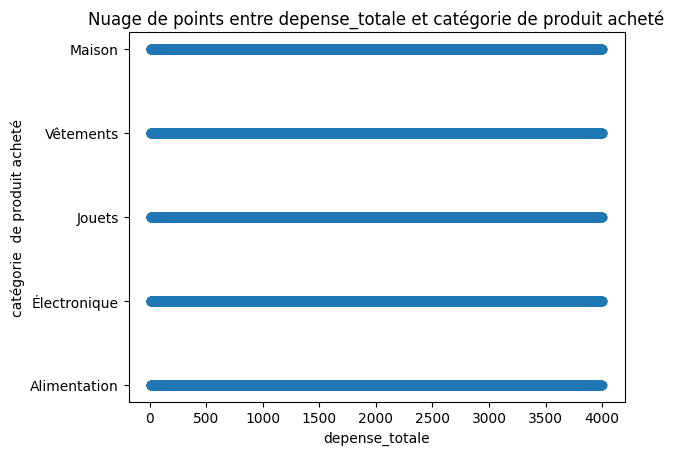

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemple avec pandas et matplotlib
data = pd.read_excel("Données_Conso_Stage_IA.xlsx")
plt.scatter(df['depense_totale'], df['Catégorie de produit acheté'])
plt.xlabel('depense_totale')
plt.ylabel('catégorie  de produit acheté')
plt.title('Nuage de points entre depense_totale et catégorie de produit acheté')
plt.show()

Matrice de corrélation :

Visualise la relation entre toutes les paires de variables.

In [ ]:
# Exclure les colonnes non numériques de la matrice de corrélation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

In [ ]:
corr_matrix

Âge  Prix du produit  Quantité  \
Âge                                 1.000000        -0.000927 -0.003842   
Prix du produit                    -0.000927         1.000000  0.002229   
Quantité                           -0.003842         0.002229  1.000000   
Engagement sur les réseaux sociaux  0.003206         0.000361  0.000327   
depense_totale                     -0.002197         0.741112  0.585987   

                                    Engagement sur les réseaux sociaux  \
Âge                                                           0.003206   
Prix du produit                                               0.000361   
Quantité                                                      0.000327   
Engagement sur les réseaux sociaux                            1.000000   
depense_totale                                                0.001247   

                                    depense_totale  
Âge                                      -0.002197  
Prix du produit                           0.741112  
Quantité                                  0.585987  
Engagement sur les réseaux sociaux        0.001247  
depense_totale                            1.000000

In [ ]:
# Créer le tableau croisé entre les variables 'Sexe' et 'Catégorie de produit acheté'
cross_tab = pd.crosstab(df['Sexe'], df['Catégorie de produit acheté'])

# Afficher le tableau croisé
print(cross_tab)

Catégorie de produit acheté  Alimentation  Jouets  Maison  Vêtements  \
Sexe                                                                   
Femme                                7928    7824    7766       7756   
Homme                                8178    8125    8154       8363   

Catégorie de produit acheté  Électronique  
Sexe                                       
Femme                                7894  
Homme                                8141  


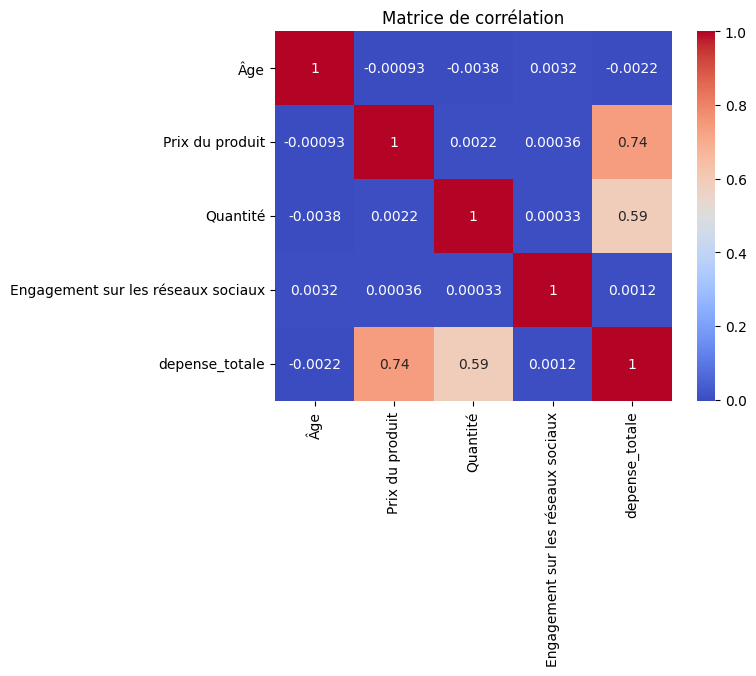

In [ ]:
# Afficher la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Boxplot (Diagramme en boîte) :

Permet de visualiser la distribution d'une variable quantitative en fonction d'une variable qualitative.

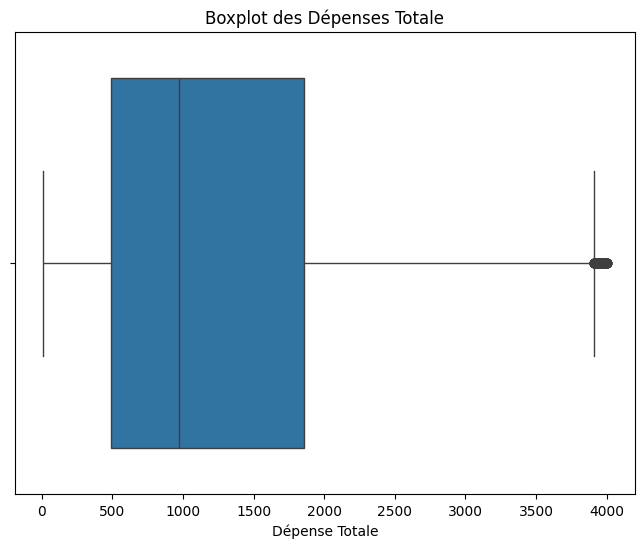

In [ ]:
# Tracer le boxplot avec Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['depense_totale'])
plt.title('Boxplot des Dépenses Totale')
plt.xlabel('Dépense Totale')
plt.show()

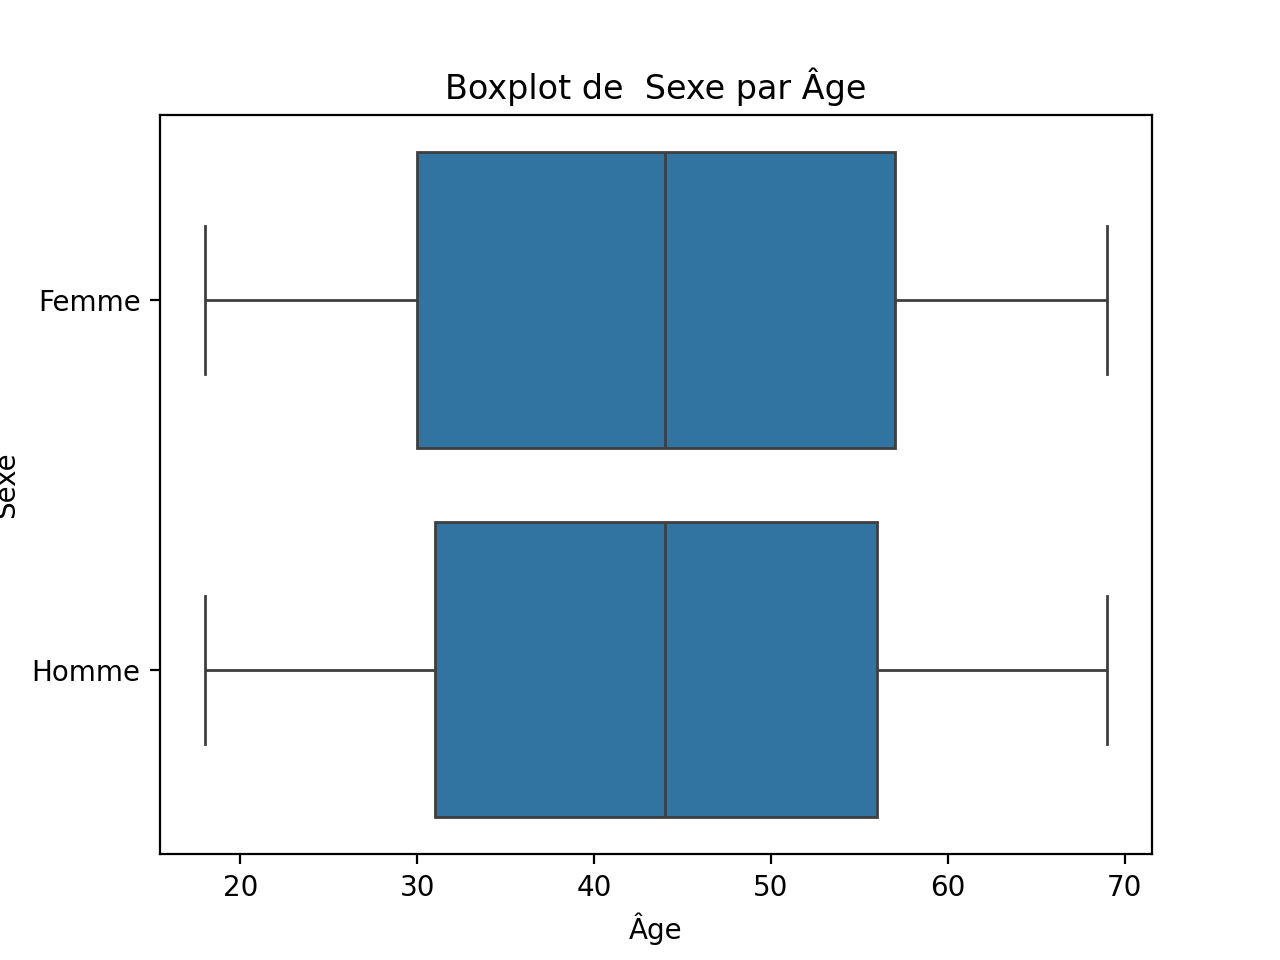

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Âge', y='Sexe', data=df)
plt.title('Boxplot de  Sexe par Âge')
plt.show ()

Histogramme et densité :

Pour visualiser la distribution d'une variable quantitative.

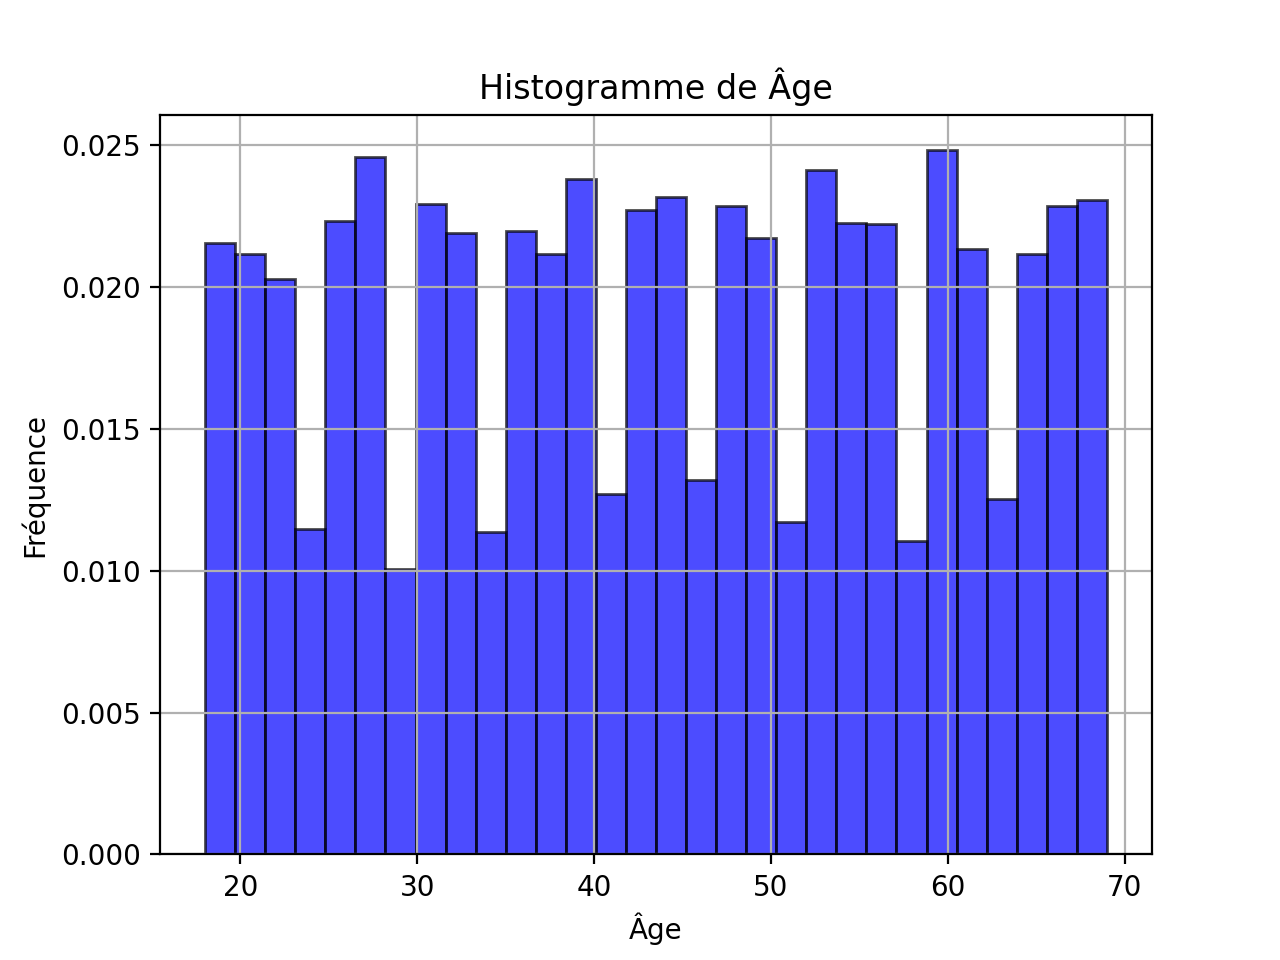

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Âge'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogramme de Âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

Histogramme des depense_totale **texte en gras**

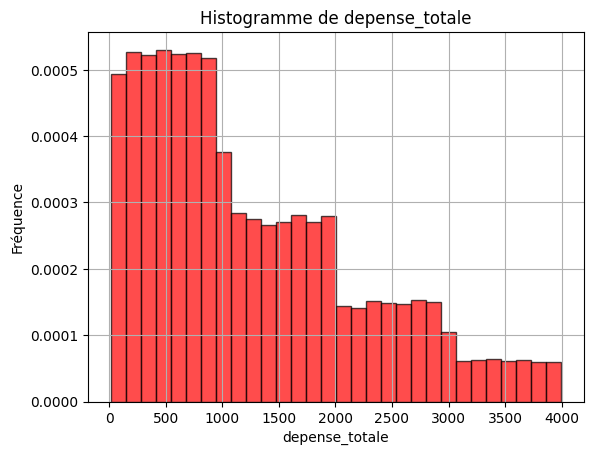

In [ ]:
plt.hist(df['depense_totale'], bins=30, density=True, alpha=0.7, color='red', edgecolor='black')
plt.title('Histogramme de depense_totale')
plt.xlabel('depense_totale')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

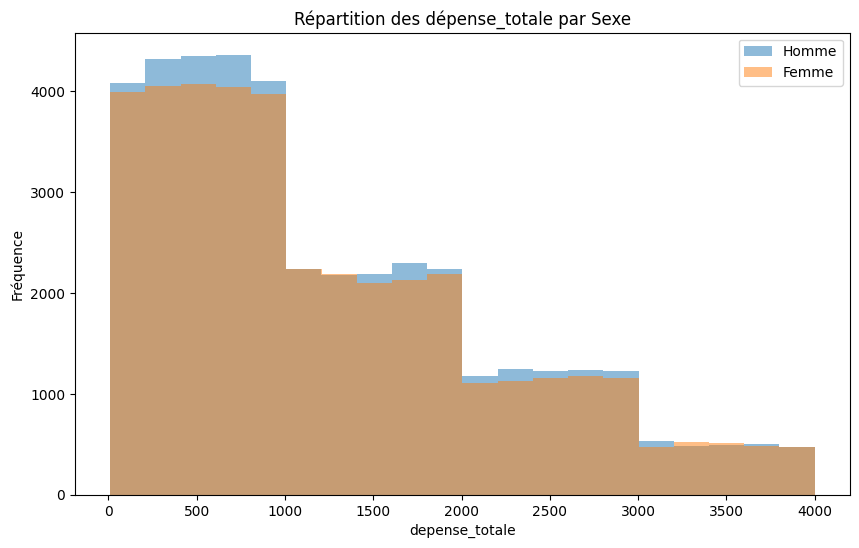

       depense_totale
count    80129.000000
mean      1261.845094
std        962.829898
min         10.060000
25%        493.350000
50%        971.720000
75%       1859.370000
max       3999.560000


In [ ]:
df[['Sexe','depense_totale']]
plt.figure(figsize=(10, 6))


plt.hist(df[df['Sexe'] == 'Homme']['depense_totale'], bins=20, alpha=0.5, label='Homme')

plt.hist(df[df['Sexe'] == 'Femme']['depense_totale'], bins=20, alpha=0.5, label='Femme')

# Ajouter des labels et un titre
plt.xlabel('depense_totale')
plt.ylabel('Fréquence')
plt.title('Répartition des dépense_totale par Sexe')
plt.legend()

plt.show()
print(df[['Sexe', 'depense_totale']].describe())

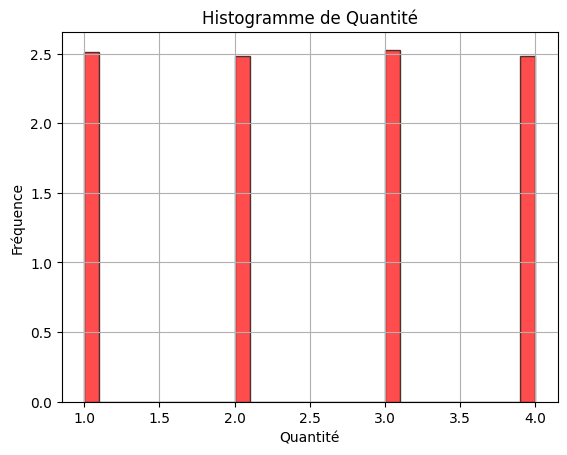

In [ ]:
plt.hist(df['Quantité'], bins=30, density=True, alpha=0.7, color='red', edgecolor='black')
plt.title('Histogramme de Quantité')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

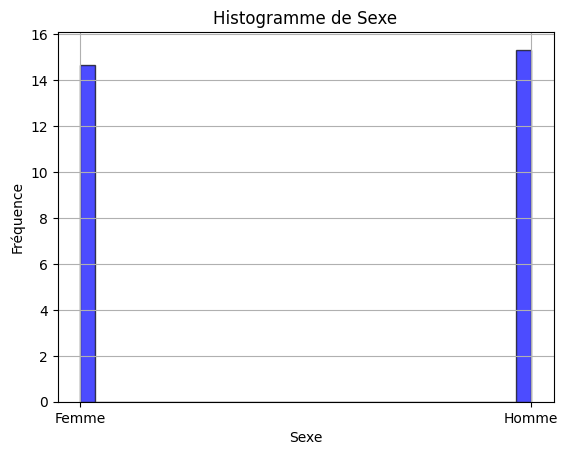

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Sexe'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogramme de Sexe')
plt.xlabel('Sexe')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

Pairplot (nuage de points multiple) :

Pour visualiser les relations entre plusieurs paires de variables.

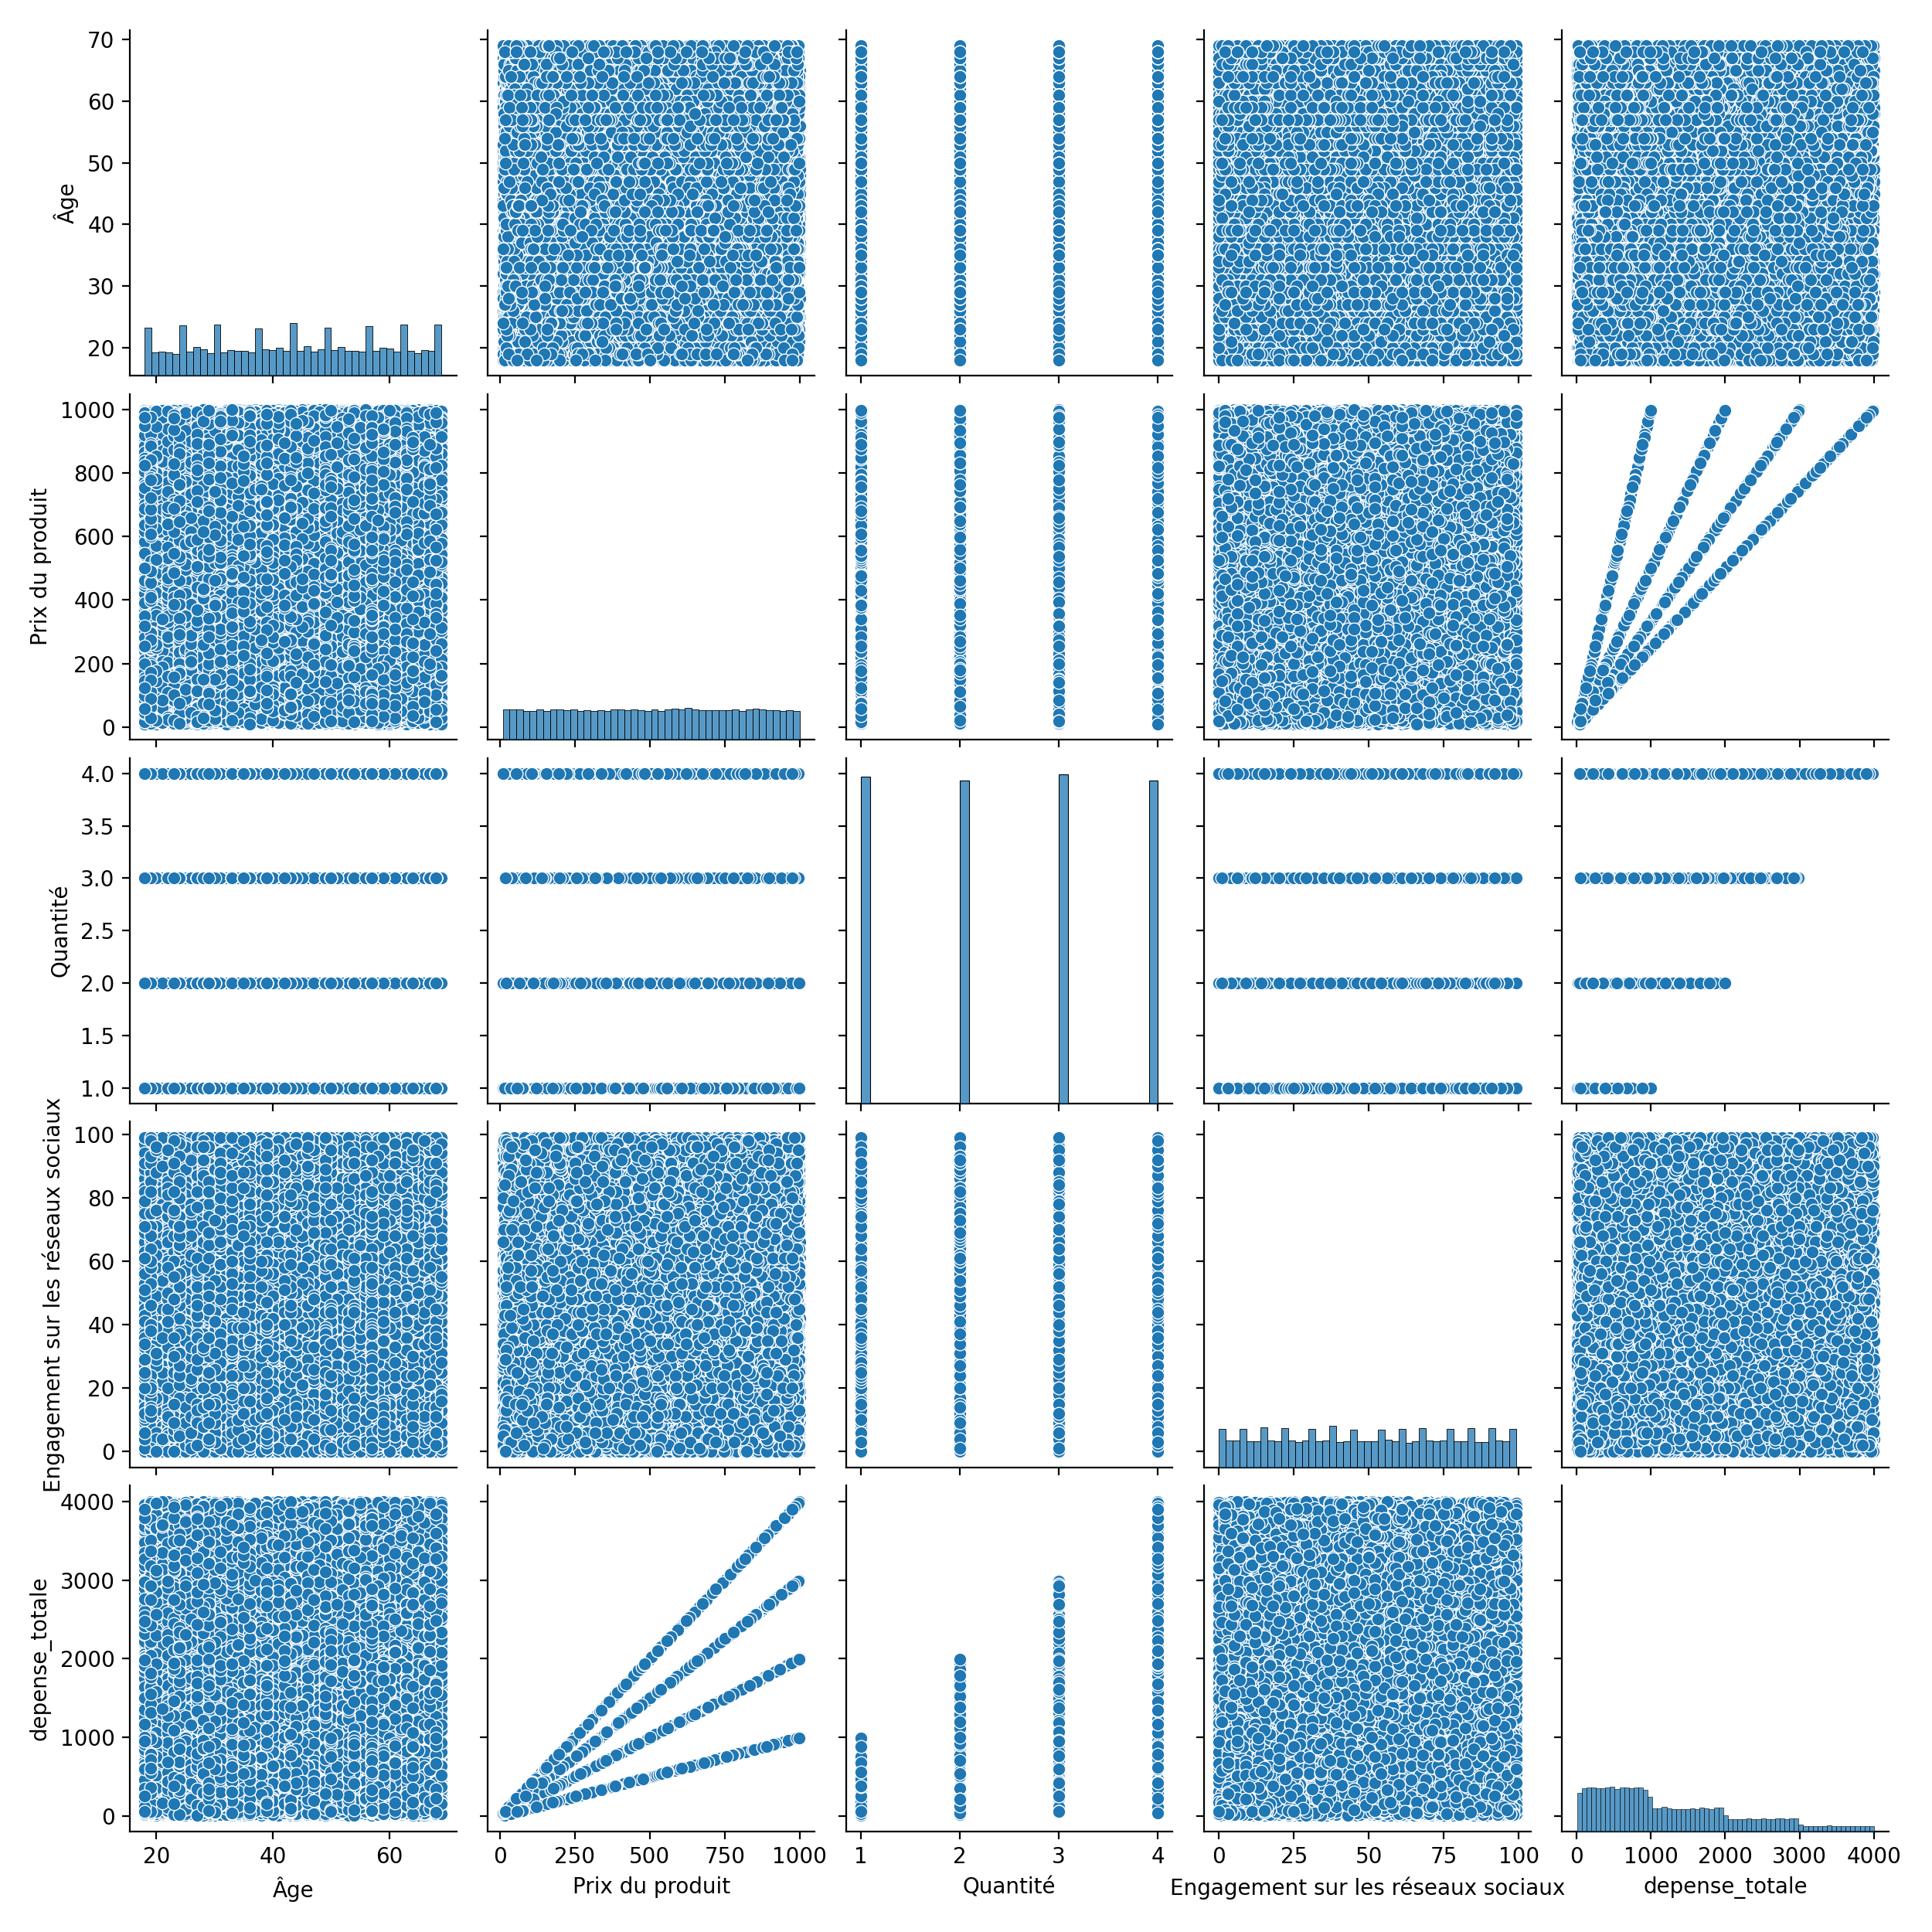

In [ ]:
sns.pairplot(df)
plt.show()

Diagramme de densité pour l'engagement sur les réseaux sociaux : Engagement sur les réseaux sociaux :



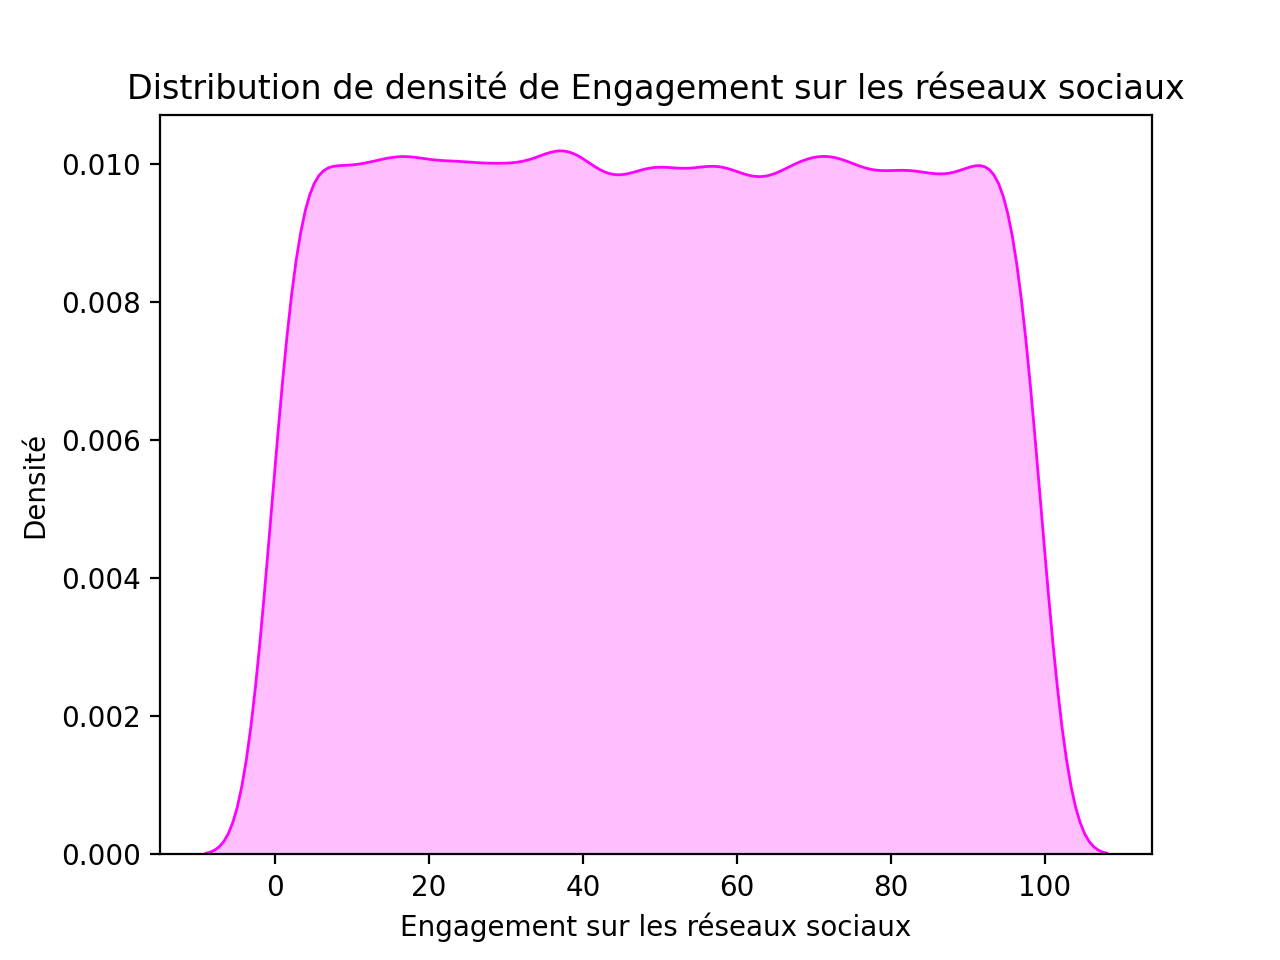

In [ ]:
import seaborn as sns

sns.kdeplot(df['Engagement sur les réseaux sociaux'], fill=True, color='magenta')
plt.title('Distribution de densité de Engagement sur les réseaux sociaux')
plt.xlabel('Engagement sur les réseaux sociaux')
plt.ylabel('Densité')
plt.show()

Diagrammes à barres pour les variables catégorielles :

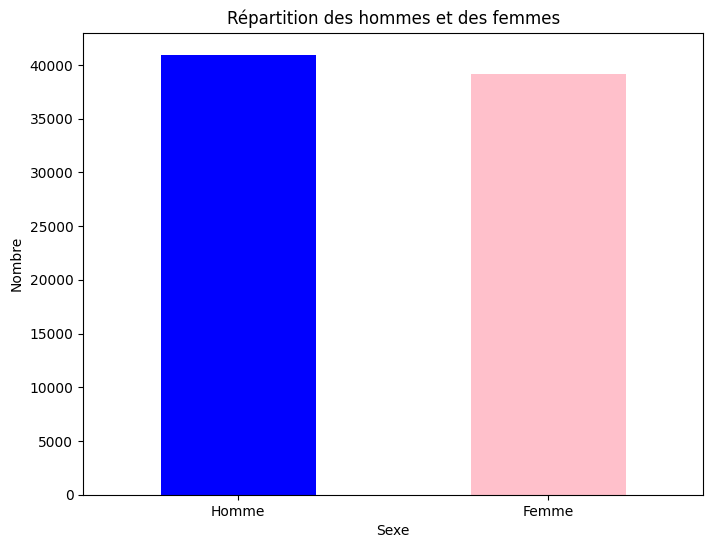

In [ ]:
#Créer une table de fréquence pour les sexes

Sexe_counts = df['Sexe'].value_counts()
Sexe_counts

# Tracer l'histogramme
plt.figure(figsize=(8, 6))
Sexe_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.title('Répartition des hommes et des femmes')
plt.xticks(rotation=0)
plt.show()

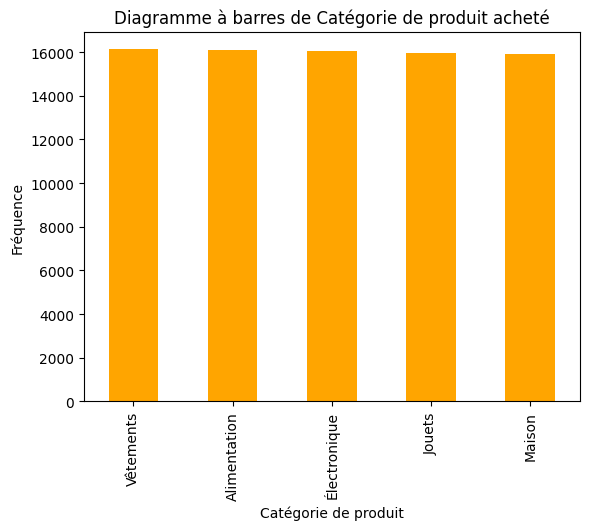

In [ ]:
df['Catégorie de produit acheté'].value_counts().plot(kind='bar', color='orange')
plt.title('Diagramme à barres de Catégorie de produit acheté')
plt.xlabel('Catégorie de produit')
plt.ylabel('Fréquence')
plt.show()

Diagrammes de dispersion (scatter plots) Les diagrammes de dispersion sont utilisés pour visualiser la relation entre deux variables.

Exemple avec Matplotlib

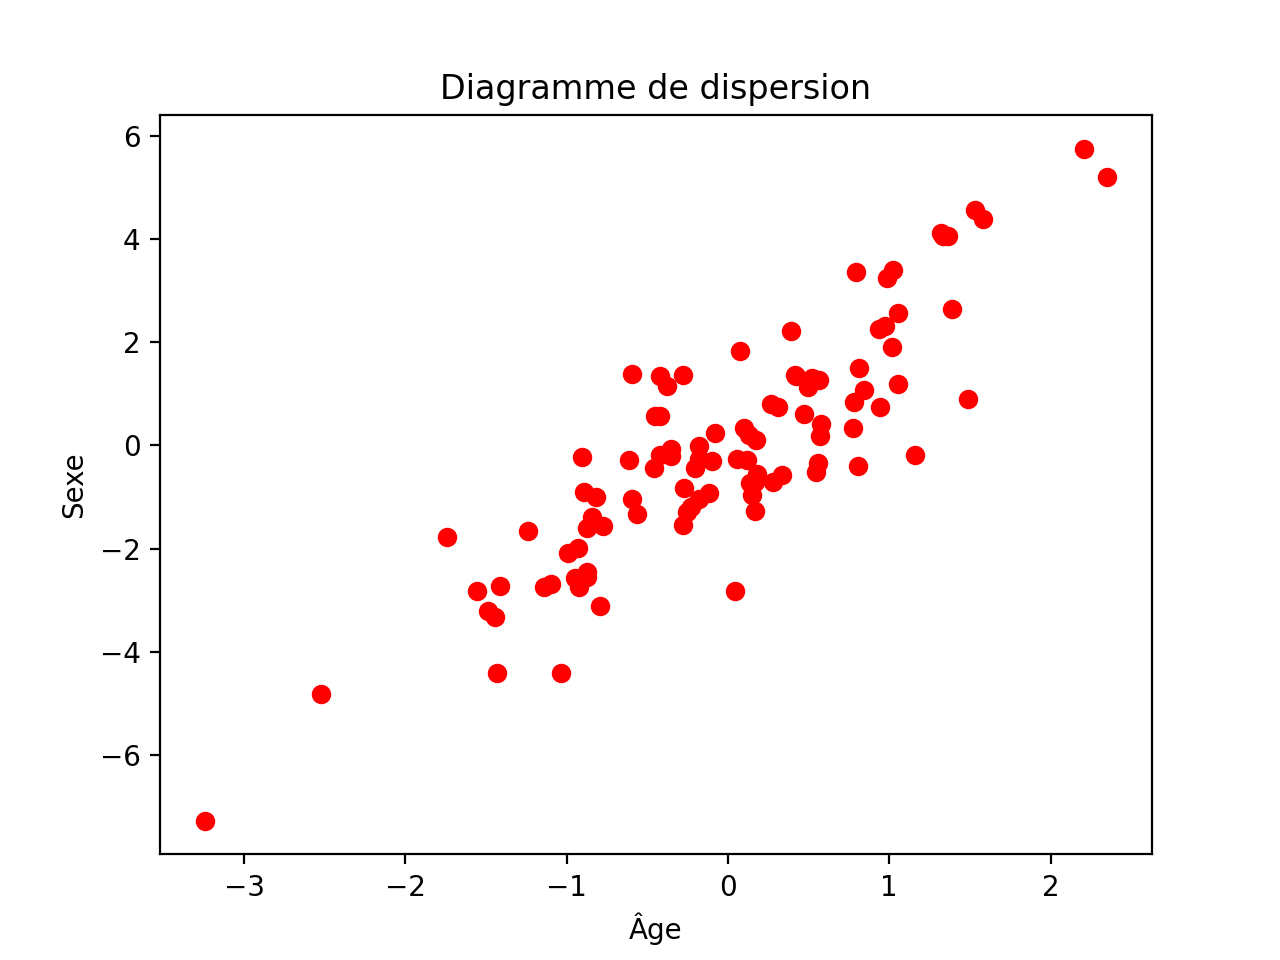

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Âge = np.random.randn(100)
Sexe = 2 * Âge + np.random.randn(100)  # Exemple de données

plt.scatter(Âge, Sexe, color='red')
plt.title('Diagramme de dispersion')
plt.xlabel('Âge')
plt.ylabel('Sexe')
plt.show()


Diagrammes à secteurs (sectors plots) Les diagrammes à secteurs sont similaires aux diagrammes circulaires mais représentent généralement une seule série de données.


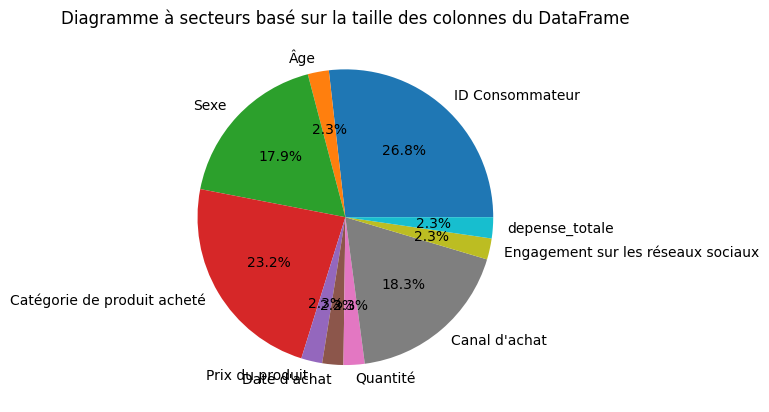

In [ ]:
# Obtenir la taille de chaque colonne
sizes = []
labels = []

for column in df.columns:
    taille_colonne = sys.getsizeof(df[column])
    sizes.append(taille_colonne)
    labels.append(column)

# Créer le diagramme à secteurs
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Diagramme à secteurs basé sur la taille des colonnes du DataFrame')
plt.show()

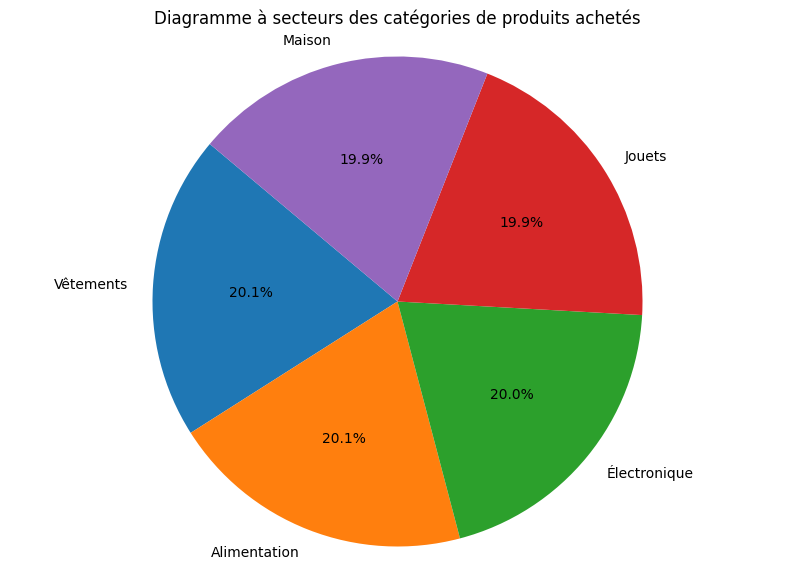

In [ ]:
import matplotlib.pyplot as plt

# Somme des valeurs pour chaque catégorie de produit acheté
somme_par_categorie = df['Catégorie de produit acheté'].value_counts()

# Tracé du diagramme à secteurs
plt.figure(figsize=(10, 7))
plt.pie(somme_par_categorie, labels=somme_par_categorie.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diagramme à secteurs des catégories de produits achetés')
plt.show()


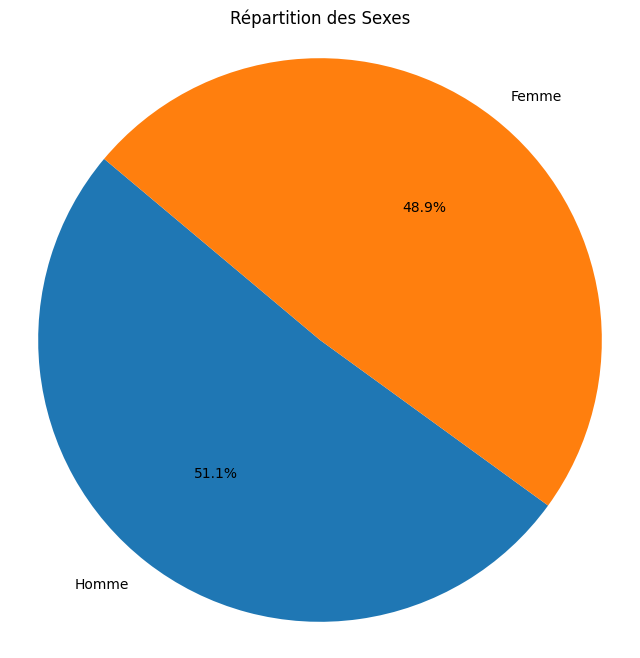

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame contient une colonne nommée "sexe"
# Calculer le nombre de personnes de chaque sexe
counts = df['Sexe'].value_counts()

# Créer le diagramme en secteurs
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le diagramme soit un cercle plutôt qu'une ellipse

# Afficher le diagramme
plt.title("Répartition des Sexes")
plt.show()

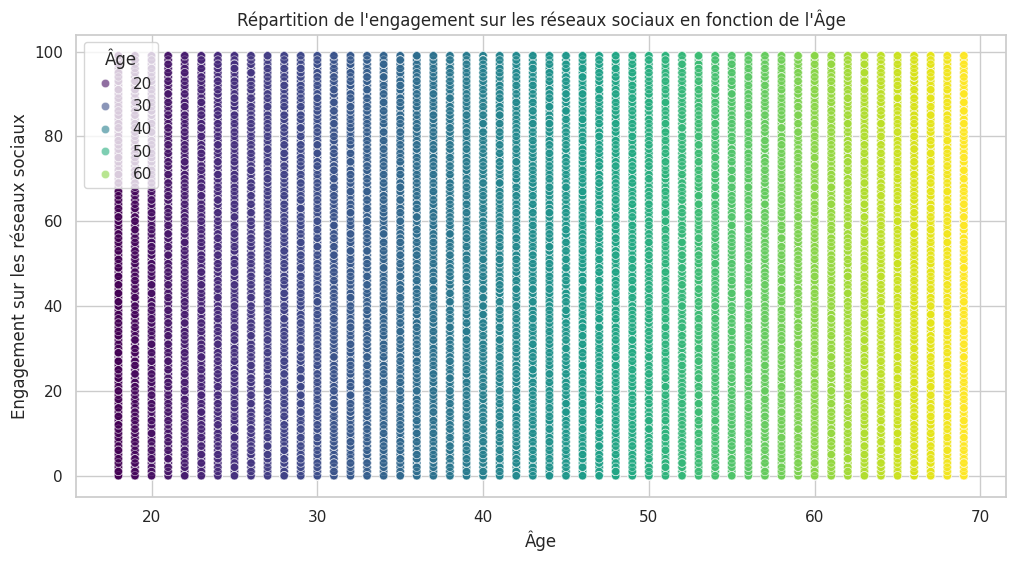

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de base pour améliorer l'affichage
sns.set(style="whitegrid")

# Crée un plot de la répartition de l'engagement en fonction de l'âge
plt.figure(figsize=(12, 6))

# Utilise un scatter plot pour montrer la relation entre l'âge et l'engagement
sns.scatterplot(data=df, x='Âge', y='Engagement sur les réseaux sociaux', hue='Âge', palette='viridis', alpha=0.6)

# Ajoute les labels et le titre
plt.title('Répartition de l\'engagement sur les réseaux sociaux en fonction de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Engagement sur les réseaux sociaux')

# Affiche le plot
plt.show()


In [ ]:
import pandas as pd

# Définir le nombre de bins
num_bins = 5

# Créer les tranches d'âge automatiquement
df['Âge_group'] = pd.cut(df['Âge'], bins=num_bins)

# Afficher les premières lignes pour vérifier
print(df)

       ID Consommateur  Âge  Sexe  Catégorie de produit acheté  \
0                 7482   35     0                            0   
1                 7482   35     0                            4   
2                 7482   35     0                            0   
3                 7482   35     0                            1   
4                 7482   35     0                            0   
...                ...  ...   ...                          ...   
80124             1518   42     1                            0   
80125             1518   42     1                            4   
80126             1518   42     1                            3   
80127             1518   42     1                            1   
80128             1518   42     1                            3   

       Prix du produit Date d'achat  Quantité  Canal d'achat  \
0               541.85   2023-11-21         2              0   
1               854.76   2023-06-15         2              1   
2              

<ipython-input-89-616e221e72f2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Âge_group', y='Engagement sur les réseaux sociaux', palette='viridis')


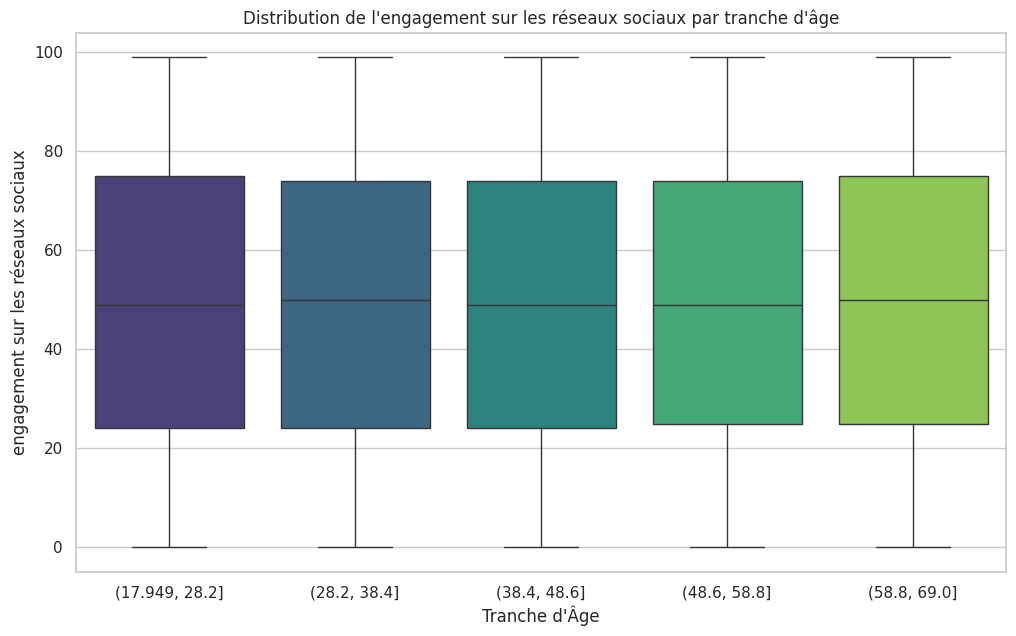

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de base pour améliorer l'affichage
sns.set(style="whitegrid")

# Créer un plot de la répartition de l'engagement en fonction des tranches d'âge
plt.figure(figsize=(12, 7))

# Utiliser un boxplot pour montrer la distribution de l'engagement par tranche d'âge
sns.boxplot(data=df, x='Âge_group', y='Engagement sur les réseaux sociaux', palette='viridis')

# Ajouter les labels et le titre
plt.title('Distribution de l\'engagement sur les réseaux sociaux par tranche d\'âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('engagement sur les réseaux sociaux')

# Afficher le plot
plt.show()


Analyse de séries temporelles

Analyser et visualiser les données séquentielles.

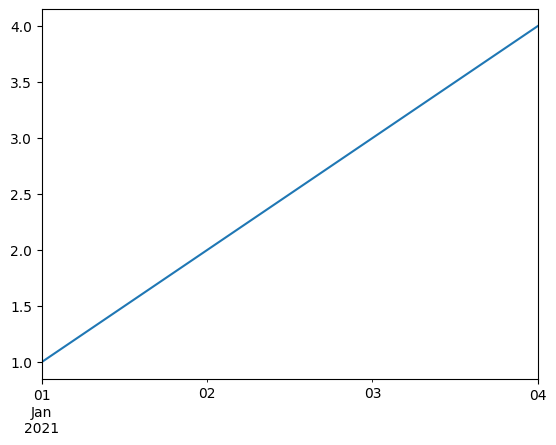

In [ ]:
zimport pandas as pd
import matplotlib.pyplot as plt

df = pd.Series([1, 2, 3, 4], index=pd.date_range('2021-01-01', periods=4))

df.plot()
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending = False)

ID Consommateur                       0
Âge                                   0
Sexe                                  0
Catégorie de produit acheté           0
Prix du produit                       0
Date d'achat                          0
Quantité                              0
Canal d'achat                         0
Engagement sur les réseaux sociaux    0
depense_totale                        0
dtype: int64

**Vérifiaction des valeurs manquantes dans notre Base de données**

In [ ]:
df.isnull()

ID Consommateur    Âge   Sexe  Catégorie de produit acheté  \
0                False  False  False                        False   
1                False  False  False                        False   
2                False  False  False                        False   
3                False  False  False                        False   
4                False  False  False                        False   
...                ...    ...    ...                          ...   
80124            False  False  False                        False   
80125            False  False  False                        False   
80126            False  False  False                        False   
80127            False  False  False                        False   
80128            False  False  False                        False   

       Prix du produit  Date d'achat  Quantité  Canal d'achat  \
0                False         False     False          False   
1                False         False     False          False   
2                False         False     False          False   
3                False         False     False          False   
4                False         False     False          False   
...                ...           ...       ...            ...   
80124            False         False     False          False   
80125            False         False     False          False   
80126            False         False     False          False   
80127            False         False     False          False   
80128            False         False     False          False   

       Engagement sur les réseaux sociaux  depense_totale  
0                                   False           False  
1                                   False           False  
2                                   False           False  
3                                   False           False  
4                                   False           False  
...                                   ...             ...  
80124                               False           False  
80125                               False           False  
80126                               False           False  
80127                               False           False  
80128                               False           False  

[80129 rows x 10 columns]

**transformation de toutes les valeur categorique pour avoire une base de donnée entierement numerique pour une bonne prediction**

In [ ]:
from sklearn.preprocessing import LabelEncoder

scale = LabelEncoder()

In [ ]:
for i in df.describe(include = 'O'):
    df[i] = scale.fit_transform(df[i])

In [ ]:
df.head(1000)

ID Consommateur  Âge  Sexe  Catégorie de produit acheté  Prix du produit  \
0               7482   35     0                            0           541.85   
1               7482   35     0                            4           854.76   
2               7482   35     0                            0           169.68   
3               7482   35     0                            1            48.57   
4               7482   35     0                            0           252.11   
..               ...  ...   ...                          ...              ...   
995             3378   30     0                            3            18.09   
996             3378   30     0                            2           130.12   
997             2201   38     1                            3           731.44   
998             1488   61     0                            2           560.18   
999             1488   61     0                            0            74.85   

    Date d'achat  Quantité  Canal d'achat  Engagement sur les réseaux sociaux  \
0     2023-11-21         2              0                                  99   
1     2023-06-15         2              1                                  31   
2     2024-04-05         3              0                                  66   
3     2023-08-03         4              0                                  38   
4     2023-06-01         1              0                                  81   
..           ...       ...            ...                                 ...   
995   2023-07-26         3              1                                  74   
996   2023-10-05         4              1                                  14   
997   2023-12-27         1              1                                  26   
998   2023-08-08         1              1                                  80   
999   2024-04-10         2              0                                   1   

     depense_totale  
0           1083.70  
1           1709.52  
2            509.04  
3            194.28  
4            252.11  
..              ...  
995           54.27  
996          520.48  
997          731.44  
998          560.18  
999          149.70  

[1000 rows x 10 columns]

In [ ]:
df.dtypes

ID Consommateur                                int64
Âge                                            int64
Sexe                                           int64
Catégorie de produit acheté                    int64
Prix du produit                              float64
Date d'achat                          datetime64[ns]
Quantité                                       int64
Canal d'achat                                  int64
Engagement sur les réseaux sociaux             int64
depense_totale                               float64
dtype: object

**matrice de Correlation de l'ensemble de la base de données**

In [ ]:
df.corr()

ID Consommateur       Âge      Sexe  \
ID Consommateur                            1.000000 -0.003174  0.008957   
Âge                                       -0.003174  1.000000  0.005961   
Sexe                                       0.008957  0.005961  1.000000   
Catégorie de produit acheté               -0.002209 -0.005372  0.002639   
Prix du produit                           -0.007809 -0.000927  0.003900   
Date d'achat                              -0.003399 -0.000169 -0.000828   
Quantité                                   0.000541 -0.003842 -0.007864   
Canal d'achat                             -0.007410 -0.001671  0.000991   
Engagement sur les réseaux sociaux        -0.009523  0.003206 -0.002441   
depense_totale                            -0.004114 -0.002197 -0.001493   

                                    Catégorie de produit acheté  \
ID Consommateur                                       -0.002209   
Âge                                                   -0.005372   
Sexe                                                   0.002639   
Catégorie de produit acheté                            1.000000   
Prix du produit                                       -0.001045   
Date d'achat                                          -0.000497   
Quantité                                               0.002438   
Canal d'achat                                          0.003068   
Engagement sur les réseaux sociaux                    -0.000539   
depense_totale                                         0.000006   

                                    Prix du produit  Date d'achat  Quantité  \
ID Consommateur                           -0.007809     -0.003399  0.000541   
Âge                                       -0.000927     -0.000169 -0.003842   
Sexe                                       0.003900     -0.000828 -0.007864   
Catégorie de produit acheté               -0.001045     -0.000497  0.002438   
Prix du produit                            1.000000      0.001843  0.002229   
Date d'achat                               0.001843      1.000000  0.000973   
Quantité                                   0.002229      0.000973  1.000000   
Canal d'achat                              0.007665     -0.005817 -0.004810   
Engagement sur les réseaux sociaux         0.000361      0.001287  0.000327   
depense_totale                             0.741112      0.000486  0.585987   

                                    Canal d'achat  \
ID Consommateur                         -0.007410   
Âge                                     -0.001671   
Sexe                                     0.000991   
Catégorie de produit acheté              0.003068   
Prix du produit                          0.007665   
Date d'achat                            -0.005817   
Quantité                                -0.004810   
Canal d'achat                            1.000000   
Engagement sur les réseaux sociaux      -0.001513   
depense_totale                           0.002887   

                                    Engagement sur les réseaux sociaux  \
ID Consommateur                                              -0.009523   
Âge                                                           0.003206   
Sexe                                                         -0.002441   
Catégorie de produit acheté                                  -0.000539   
Prix du produit                                               0.000361   
Date d'achat                                                  0.001287   
Quantité                                                      0.000327   
Canal d'achat                                                -0.001513   
Engagement sur les réseaux sociaux                            1.000000   
depense_totale                                                0.001247   

                                    depense_totale  
ID Consommateur                          -0.004114  
Âge                                      -0.002197  
Sexe                                     -0.

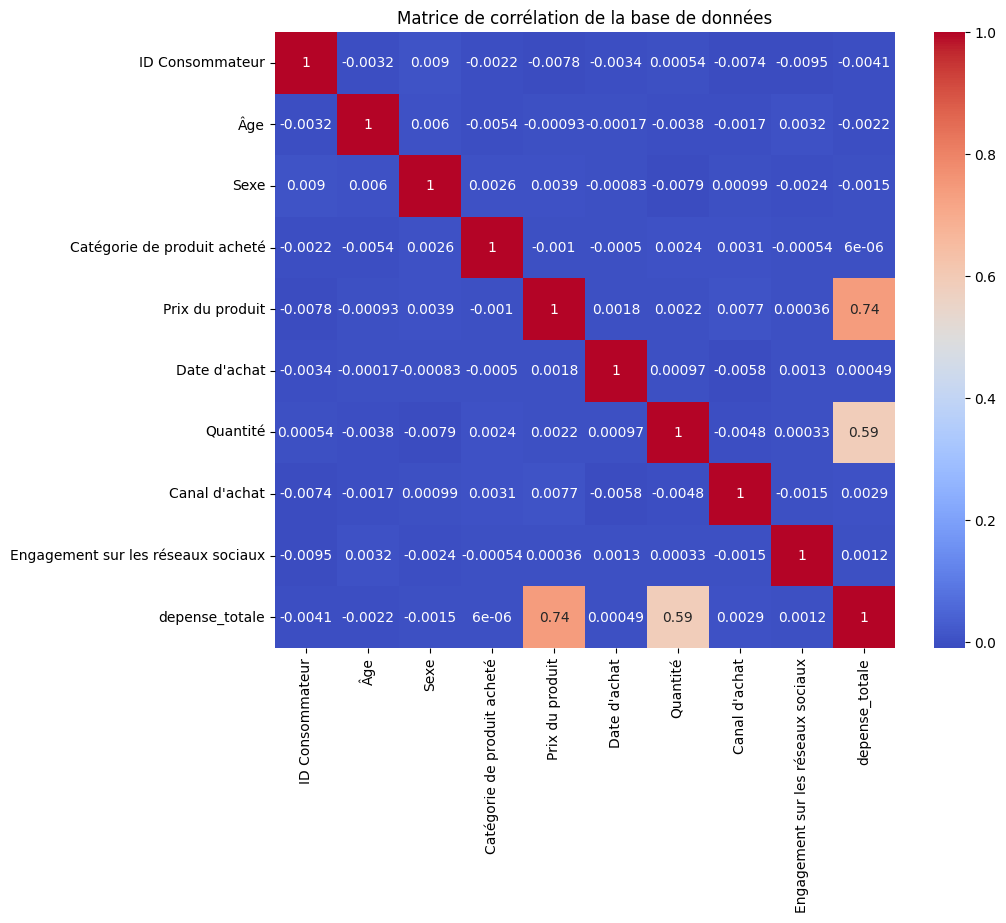

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure selon votre préférence
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de la base de données')
plt.show()

supprimons les colonenes dont on ne veut pas pour faire la prediction

In [ ]:
x = df.drop(['ID Consommateur','Date d\'achat'],axis = 1)

In [ ]:
x.head()

Âge  Sexe  Catégorie de produit acheté  Prix du produit  Quantité  \
0   35     0                            0           541.85         2   
1   35     0                            4           854.76         2   
2   35     0                            0           169.68         3   
3   35     0                            1            48.57         4   
4   35     0                            0           252.11         1   

   Canal d'achat  Engagement sur les réseaux sociaux  depense_totale  
0              0                                  99         1083.70  
1              1                                  31         1709.52  
2              0                                  66          509.04  
3              0                                  38          194.28  
4              0                                  81          252.11

In [ ]:
Data = x

In [ ]:
Data

Âge  Sexe  Catégorie de produit acheté  Prix du produit  Quantité  \
0       35     0                            0           541.85         2   
1       35     0                            4           854.76         2   
2       35     0                            0           169.68         3   
3       35     0                            1            48.57         4   
4       35     0                            0           252.11         1   
...    ...   ...                          ...              ...       ...   
80124   42     1                            0           526.19         4   
80125   42     1                            4           376.45         1   
80126   42     1                            3           383.99         1   
80127   42     1                            1           482.81         4   
80128   42     1                            3           658.98         3   

       Canal d'achat  Engagement sur les réseaux sociaux  depense_totale  
0                  0                                  99         1083.70  
1                  1                                  31         1709.52  
2                  0                                  66          509.04  
3                  0                                  38          194.28  
4                  0                                  81          252.11  
...              ...                                 ...             ...  
80124              0                                  51         2104.76  
80125              1                                  10          376.45  
80126              0                                  74          383.99  
80127              1                                  92         1931.24  
80128              0                                  40         1976.94  

[80129 rows x 8 columns]

# Prétraitement

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Data.drop("depense_totale", axis = 1)
y = Data["depense_totale"]


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (64103, 7)
Test set: (16026, 7)


In [ ]:
X

Âge  Sexe  Catégorie de produit acheté  Prix du produit  Quantité  \
0       35     0                            0           541.85         2   
1       35     0                            4           854.76         2   
2       35     0                            0           169.68         3   
3       35     0                            1            48.57         4   
4       35     0                            0           252.11         1   
...    ...   ...                          ...              ...       ...   
80124   42     1                            0           526.19         4   
80125   42     1                            4           376.45         1   
80126   42     1                            3           383.99         1   
80127   42     1                            1           482.81         4   
80128   42     1                            3           658.98         3   

       Canal d'achat  Engagement sur les réseaux sociaux  
0                  0                                  99  
1                  1                                  31  
2                  0                                  66  
3                  0                                  38  
4                  0                                  81  
...              ...                                 ...  
80124              0                                  51  
80125              1                                  10  
80126              0                                  74  
80127              1                                  92  
80128              0                                  40  

[80129 rows x 7 columns]

In [ ]:
#Normaliser les caractéristiques

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled
X_test_scaled

array([[-0.04545052, -1.02670467,  0.70750476, ..., -0.44887678,
        -0.99783396, -1.36684991],
       [ 1.03004401, -1.02670467, -1.40791446, ...,  1.34090664,
        -0.99783396, -1.22823412],
       [-0.31432415,  0.97398992,  0.00236502, ...,  1.34090664,
         1.00217074,  0.98961853],
       ...,
       [ 0.82838879,  0.97398992, -1.40791446, ...,  0.44601493,
        -0.99783396, -0.60446306],
       [ 0.55951515, -1.02670467, -1.40791446, ..., -1.34376848,
         1.00217074,  1.68269748],
       [-0.91928983,  0.97398992, -1.40791446, ..., -1.34376848,
        -0.99783396,  0.64307905]])

# entrainement de quelques Modèle de machines learning pour enfin   chosire le modèle qui sera de meilleur qualiter pour construire le modèle de notre prédiction

# 1. SVR (Support Vector Regression)


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Modèle SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle SVR
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nSVR - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle SVR sur l'ensemble d'entraînement complet
svr_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Évaluer les performances du modèle SVR sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nSVR - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("SVR - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


SVR - Validation Croisée - Moyenne
MSE: 654395.2781173589, RMSE: 808.947018115129

SVR - Entraînement
MSE: 644590.6525313572, RMSE: 802.8640311605429, MAE: 630.6628360563872, R²: 0.3078932011772424
SVR - Test
MSE: 631945.0681846652, RMSE: 794.9497268284738, MAE: 625.3694282097117, R²: 0.3053278752635855


# 2. RandomForest

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Modèle RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle RandomForest
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nRandomForest - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle RandomForest sur l'ensemble d'entraînement complet
rf_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Évaluer les performances du modèle RandomForest sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nRandomForest - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("RandomForest - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


RandomForest - Validation Croisée - Moyenne
MSE: 0.030721408011968383, RMSE: 0.17527523502186035

RandomForest - Entraînement
MSE: 0.0031089951980407373, RMSE: 0.05575836437738052, MAE: 0.03754143175826755, R²: 0.9999999966528385
RandomForest - Test
MSE: 0.020099509549483894, RMSE: 0.14177273909142016, MAE: 0.09485033071260414, R²: 0.9999999781468603


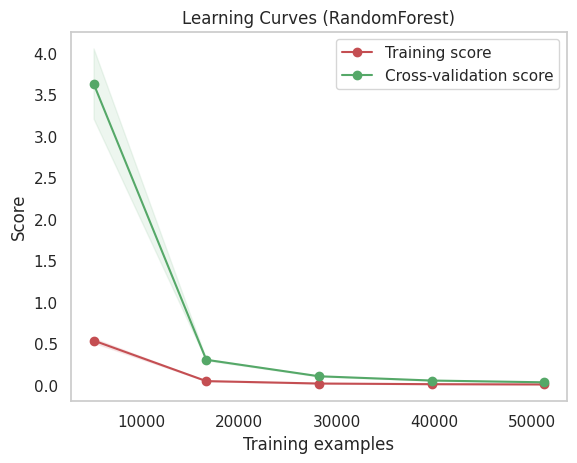

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assurer que X_train et y_train sont définis, sinon utiliser un jeu de données fictif pour l'exemple
# from sklearn.datasets import make_regression
# X_train, y_train = make_regression(n_samples=100, n_features=20, random_state=42)

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error'):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Définir le modèle RandomForest
random_forest = RandomForestRegressor(random_state=42)

# Normaliser les données d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Afficher la courbe d'apprentissage pour le modèle RandomForest
plot_learning_curve(random_forest, "Learning Curves (RandomForest)", X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
plt.show()


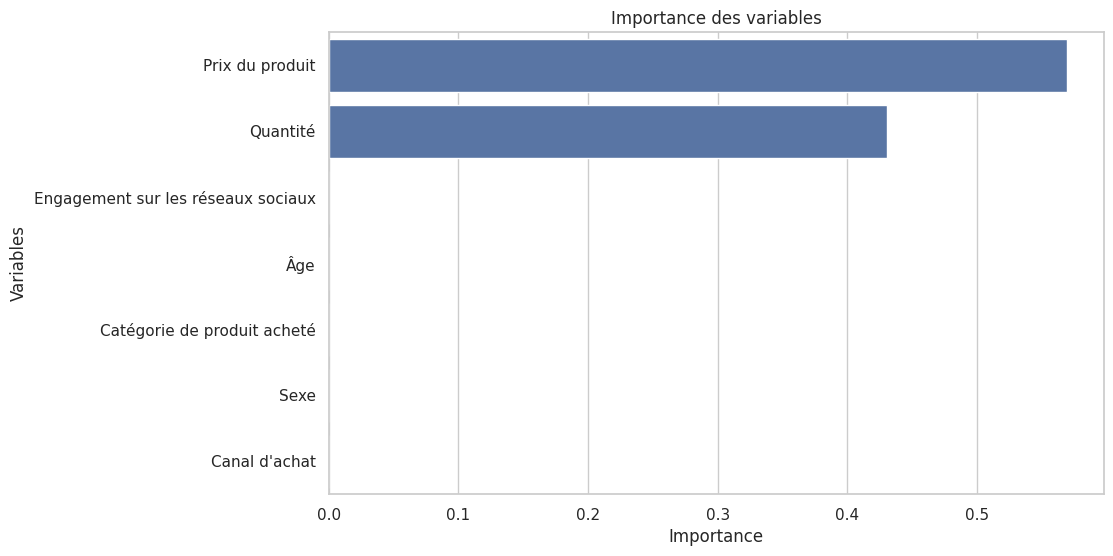

In [ ]:
# Extraction de l'importance des caractéristiques
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Tracé du graphique
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importance des variables')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

# 3- Modèle LinearRegressor

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle LinearRegressor
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nLinearRegressor - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle LinearRegressor sur l'ensemble d'entraînement complet
lr_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Évaluer les performances du modèle LinearRegressor sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nLinearRegressor - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("LinearRegressor - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


LinearRegressor - Validation Croisée - Moyenne
MSE: 609778.8054938905, RMSE: 780.8833494792232

LinearRegressor - Entraînement
MSE: 609659.9098859216, RMSE: 780.8072168505627, MAE: 617.6796051909182, R²: 0.34539887144703874
LinearRegressor - Test
MSE: 604759.4501123733, RMSE: 777.6628126073493, MAE: 613.9589074185252, R²: 0.33521194591991843


# 4-Modèle KNeighboring

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle KNeighboring
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nKNeighboring - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle KNeighboring sur l'ensemble d'entraînement complet
knn_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle KNeighboring sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nKNeighboring - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("KNeighboring - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


KNeighboring - Validation Croisée - Moyenne
MSE: 731243.5475289865, RMSE: 855.1277960217329

KNeighboring - Entraînement
MSE: 487959.53700112767, RMSE: 698.541005955361, MAE: 535.3512949783941, R²: 0.4760704149484134
KNeighboring - Test
MSE: 723136.1968333309, RMSE: 850.3741510848804, MAE: 653.5095300137277, R²: 0.2050850879000342


# 5-modèle de xgboost

In [ ]:
import xgboost as xgb

# Normaliser les données de test en utilisant les paramètres de normalisation des données d'entraînement
X_test_scaled = scaler.transform(X_test)

# Créer et ajuster le modèle XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Validation croisée pour évaluer les performances du modèle
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle sur l'ensemble d'entraînement complet
model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Évaluer les performances du modèle XGBoost sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nXGBoost - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("XGBoost - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")

Validation Croisée - Moyenne
MSE: 612942.8936883494, RMSE: 782.9066953911873

XGBoost - Entraînement
MSE: 595565.7345676194, RMSE: 771.7290551531796, MAE: 610.2015926251622, R²: 0.3605320020987005
XGBoost - Test
MSE: 609032.8944720317, RMSE: 780.4055961306478, MAE: 615.1404924300487, R²: 0.33051431819446664


# 6-modele LASSOR regression

In [ ]:
# Modèle Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle Lasso
cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nLasso - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle Lasso sur l'ensemble d'entraînement complet
lasso_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Évaluer les performances du modèle Lasso sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nLasso - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Lasso - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


Lasso - Validation Croisée - Moyenne
MSE: 609775.2588576362, RMSE: 780.88107856295

Lasso - Entraînement
MSE: 609664.9740013629, RMSE: 780.8104597156489, MAE: 617.6850238084337, R²: 0.345393434029178
Lasso - Test
MSE: 604692.1623750648, RMSE: 777.6195486065566, MAE: 613.9632256176156, R²: 0.3352859126581653


# 7- le modèle de gradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Modèle Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle Gradient Boosting
cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nGradient Boosting - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle Gradient Boosting sur l'ensemble d'entraînement complet
gb_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = gb_model.predict(X_train_scaled)
y_test_pred = gb_model.predict(X_test_scaled)

# Évaluer les performances du modèle Gradient Boosting sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nGradient Boosting - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Gradient Boosting - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")



Gradient Boosting - Validation Croisée - Moyenne
MSE: 610532.7635695164, RMSE: 781.365960078577

Gradient Boosting - Entraînement
MSE: 607051.1656076288, RMSE: 779.1348828076103, MAE: 616.2462435208017, R²: 0.3481999199020638
Gradient Boosting - Test
MSE: 605514.8088950634, RMSE: 778.1483206272846, MAE: 614.0626300944901, R²: 0.33438160999844824


# 8- le modèle de regression Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Modèle Ridge Regression
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle Ridge Regression
cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nRidge Regression - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle Ridge Regression sur l'ensemble d'entraînement complet
ridge_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Évaluer les performances du modèle Ridge Regression sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nRidge Regression - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Ridge Regression - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")



Ridge Regression - Validation Croisée - Moyenne
MSE: 609778.803491462, RMSE: 780.8833481970671

Ridge Regression - Entraînement
MSE: 609659.9099642468, RMSE: 780.8072169007193, MAE: 617.6795870203359, R²: 0.3453988713629399
Ridge Regression - Test
MSE: 604759.1736326286, RMSE: 777.6626348440747, MAE: 613.9588896375407, R²: 0.33521224984312525


## 9-Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Modèle Elastic Net
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle Elastic Net
cv_scores = cross_val_score(elastic_net_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nElastic Net - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle Elastic Net sur l'ensemble d'entraînement complet
elastic_net_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = elastic_net_model.predict(X_train_scaled)
y_test_pred = elastic_net_model.predict(X_test_scaled)

# Évaluer les performances du modèle Elastic Net sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nElastic Net - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Elastic Net - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


Elastic Net - Validation Croisée - Moyenne
MSE: 645631.3393932197, RMSE: 803.5118788127651

Elastic Net - Entraînement
MSE: 645543.6378915488, RMSE: 803.4573030918001, MAE: 639.8285623744215, R²: 0.30686996628486995
Elastic Net - Test
MSE: 634831.823095813, RMSE: 796.7633419628522, MAE: 634.8108566459688, R²: 0.30215458019621355


# 10-Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modèle Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Validation croisée pour évaluer les performances du modèle Decision Tree
cv_scores = cross_val_score(decision_tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des métriques de validation croisée
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)
print("\nDecision Tree - Validation Croisée - Moyenne")
print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

# Entraîner le modèle Decision Tree sur l'ensemble d'entraînement complet
decision_tree_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = decision_tree_model.predict(X_train_scaled)
y_test_pred = decision_tree_model.predict(X_test_scaled)

# Évaluer les performances du modèle Decision Tree sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nDecision Tree - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Decision Tree - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


Decision Tree - Validation Croisée - Moyenne
MSE: 1241962.4308355225, RMSE: 1114.433681667744

Decision Tree - Entraînement
MSE: 46769.450638411436, RMSE: 216.26245776466018, MAE: 61.78982067401942, R²: 0.9497829286898087
Decision Tree - Test
MSE: 1236142.8844311931, RMSE: 1111.8196276515328, MAE: 831.7957561150631, R²: -0.35884279700508115


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir la grille des hyperparamètres pour RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialiser le modèle RandomForest
random_forest_model = RandomForestRegressor()

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraîner GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres pour RandomForest:", best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_random_forest_model = grid_search.best_estimator_

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = best_random_forest_model.predict(X_train_scaled)
y_test_pred = best_random_forest_model.predict(X_test_scaled)

# Évaluer les performances du modèle RandomForest sur les ensembles d'entraînement et de test
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nRandomForest - Entraînement")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("RandomForest - Test")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")

Meilleurs hyperparamètres pour RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}

RandomForest - Entraînement
MSE: 580965.0254860667, RMSE: 762.2106175369553, MAE: 602.1023839426489, R²: 0.37620900576496785
RandomForest - Test
MSE: 609865.9364684976, RMSE: 780.9391374931197, MAE: 615.6064946610318, R²: 0.32959858820017784


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_svr = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ['linear', 'rbf']
}

# Définir le modèle
svr = SVR()

# Créer le GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_svr.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_svr = grid_search_svr.best_params_
best_score_svr = -grid_search_svr.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_svr = grid_search_svr.best_estimator_
best_model_svr.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_svr = best_model_svr.predict(X_train_scaled)
y_test_pred_svr = best_model_svr.predict(X_test_scaled)

# Calculer les métriques
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)
r2_train_svr = r2_score(y_train, y_train_pred_svr)

mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

# Afficher les résultats
print("SVR:")
print("Meilleurs paramètres:", best_params_svr)
print("Meilleur score (MSE):", best_score_svr)
print("Entraînement - MSE:", mse_train_svr, "RMSE:", rmse_train_svr, "MAE:", mae_train_svr, "R²:", r2_train_svr)
print("Test - MSE:", mse_test_svr, "RMSE:", rmse_test_svr, "MAE:", mae_test_svr, "R²:", r2_test_svr)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Définir le modèle
rf = RandomForestRegressor()

# Créer le GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_rf = grid_search_rf.best_estimator_
best_model_rf.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_rf = best_model_rf.predict(X_train_scaled)
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Calculer les métriques
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Afficher les résultats
print("RandomForest:")
print("Meilleurs paramètres:", best_params_rf)
print("Meilleur score (MSE):", best_score_rf)
print("Entraînement - MSE:", mse_train_rf, "RMSE:", rmse_train_rf, "MAE:", mae_train_rf, "R²:", r2_train_rf)
print("Test - MSE:", mse_test_rf, "RMSE:", rmse_test_rf, "MAE:", mae_test_rf, "R²:", r2_test_rf)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir le modèle
lr = LinearRegression()

# Entraîner le modèle
lr.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Calculer les métriques
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Afficher les résultats
print("LinearRegression:")
print("Entraînement - MSE:", mse_train_lr, "RMSE:", rmse_train_lr, "MAE:", mae_train_lr, "R²:", r2_train_lr)
print("Test - MSE:", mse_test_lr, "RMSE:", rmse_test_lr, "MAE:", mae_test_lr, "R²:", r2_test_lr)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_lasso = {
    "alpha": [0.1, 1, 10]
}

# Définir le modèle
lasso = Lasso()

# Créer le GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_lasso.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = -grid_search_lasso.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_lasso = grid_search_lasso.best_estimator_
best_model_lasso.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_lasso = best_model_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_model_lasso.predict(X_test_scaled)

# Calculer les métriques
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Afficher les résultats
print("Lasso:")
print("Meilleurs paramètres:", best_params_lasso)
print("Meilleur score (MSE):", best_score_lasso)
print("Entraînement - MSE:", mse_train_lasso, "RMSE:", rmse_train_lasso, "MAE:", mae_train_lasso, "R²:", r2_train_lasso)
print("Test - MSE:", mse_test_lasso, "RMSE:", rmse_test_lasso, "MAE:", mae_test_lasso, "R²:", r2_test_lasso)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_ridge = {
    "alpha": [0.1, 1, 10]
}

# Définir le modèle
ridge = Ridge()

# Créer le GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_ridge.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = -grid_search_ridge.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_ridge = grid_search_ridge.best_estimator_
best_model_ridge.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_ridge = best_model_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_model_ridge.predict(X_test_scaled)

# Calculer les métriques
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Afficher les résultats
print("Ridge:")
print("Meilleurs paramètres:", best_params_ridge)
print("Meilleur score (MSE):", best_score_ridge)
print("Entraînement - MSE:", mse_train_ridge, "RMSE:", rmse_train_ridge, "MAE:", mae_train_ridge, "R²:", r2_train_ridge)
print("Test - MSE:", mse_test_ridge, "RMSE:", rmse_test_ridge, "MAE:", mae_test_ridge, "R²:", r2_test_ridge)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_dt = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Définir le modèle
dt = DecisionTreeRegressor()

# Créer le GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_dt.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_dt = grid_search_dt.best_estimator_
best_model_dt.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_dt = best_model_dt.predict(X_train_scaled)
y_test_pred_dt = best_model_dt.predict(X_test_scaled)

# Calculer les métriques
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

# Afficher les résultats
print("DecisionTree:")
print("Meilleurs paramètres:", best_params_dt)
print("Meilleur score (MSE):", best_score_dt)
print("Entraînement - MSE:", mse_train_dt, "RMSE:", rmse_train_dt, "MAE:", mae_train_dt, "R²:", r2_train_dt)
print("Test - MSE:", mse_test_dt, "RMSE:", rmse_test_dt, "MAE:", mae_test_dt, "R²:", r2_test_dt)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Définir le modèle
gb = GradientBoostingRegressor()

# Créer le GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_gb.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_gb = grid_search_gb.best_params_
best_score_gb = -grid_search_gb.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_gb = grid_search_gb.best_estimator_
best_model_gb.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_gb = best_model_gb.predict(X_train_scaled)
y_test_pred_gb = best_model_gb.predict(X_test_scaled)

# Calculer les métriques
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

# Afficher les résultats
print("GradientBoosting:")
print("Meilleurs paramètres:", best_params_gb)
print("Meilleur score (MSE):", best_score_gb)
print("Entraînement - MSE:", mse_train_gb, "RMSE:", rmse_train_gb, "MAE:", mae_train_gb, "R²:", r2_train_gb)
print("Test - MSE:", mse_test_gb, "RMSE:", rmse_test_gb, "MAE:", mae_test_gb, "R²:", r2_test_gb)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_knn = {
    "n_neighbors": [3, 5, 10],
    "weights": ['uniform', 'distance']
}

# Définir le modèle
knn = KNeighborsRegressor()

# Créer le GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_knn.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_knn = grid_search_knn.best_estimator_
best_model_knn.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_knn = best_model_knn.predict(X_train_scaled)
y_test_pred_knn = best_model_knn.predict(X_test_scaled)

# Calculer les métriques
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
r2_train_knn = r2_score(y_train, y_train_pred_knn)

mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

# Afficher les résultats
print("KNeighbors:")
print("Meilleurs paramètres:", best_params_knn)
print("Meilleur score (MSE):", best_score_knn)
print("Entraînement - MSE:", mse_train_knn, "RMSE:", rmse_train_knn, "MAE:", mae_train_knn, "R²:", r2_train_knn)
print("Test - MSE:", mse_test_knn, "RMSE:", rmse_test_knn, "MAE:", mae_test_knn, "R²:", r2_test_knn)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Définir les hyperparamètres
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Définir le modèle
xgb = XGBRegressor()

# Créer le GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Effectuer la recherche sur la grille
grid_search_xgb.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = -grid_search_xgb.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred_xgb = best_model_xgb.predict(X_train_scaled)
y_test_pred_xgb = best_model_xgb.predict(X_test_scaled)

# Calculer les métriques
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Afficher les résultats
print("XGBoost:")
print("Meilleurs paramètres:", best_params_xgb)
print("Meilleur score (MSE):", best_score_xgb)
print("Entraînement - MSE:", mse_train_xgb, "RMSE:", rmse_train_xgb, "MAE:", mae_train_xgb, "R²:", r2_train_xgb)
print("Test - MSE:", mse_test_xgb, "RMSE:", rmse_test_xgb, "MAE:", mae_test_xgb, "R²:", r2_test_xgb)


1-Presentation

l'Institut Cortext Solution est un Cabinet qui a été crée en 2021 et qui est rattacher a l'institut de mathematique et de decision (ISMADE).L'institut Cortex solution est specialiser dans le domaine de l'actuariat.


1-1-les services offert par Cortext solution

l'institut Cortex solution offre un panorama de services en lien avec l'actuariat,Statistique, Informatique. Ces services sont articulés autour de six axes principaux que sont:

           -conseil
           -Assistance et sous traintement dans les domaines de l'ingenieurie financier,statistique,Informatique,gestion et Communication
           -Formation et conseil
           -Formations en Ingenieurie statistique,Acturial,Informatique,Comptable, audit et constrole de gestion
           -Formation import et export
           -Prise de participation dans toute entreprises ayant une activité complémentaire ou accesoire dans le but de Conslider ses activités

2-Organisation manageriale de l'institut Cortex solution

L'organigramme de l'institut tel que presenté ci-dessous, s'articule autour de quatre grandes composantes à savoir:

  


# recapitulatif du Calcule  de chaque modèle de machine learning

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


# Définir les modèles
models = {
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"\n{name}")

    # Validation croisée pour évaluer les performances du modèle
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcul de la métrique de validation croisée
    mse_cv = -cv_scores.mean()
    rmse_cv = np.sqrt(mse_cv)
    print("Validation Croisée - Moyenne")
    print(f"MSE: {mse_cv}, RMSE: {rmse_cv}")

    # Entraîner le modèle
    model.fit(X_train_scaled, y_train)

    # Faire des prédictions sur les données d'entraînement et de test
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculer les métriques d'évaluation
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Afficher les résultats
    print("Entraînement:")
    print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
    print("Test:")
    print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")



SVR
Validation Croisée - Moyenne
MSE: 84981.0761634036, RMSE: 291.5151388237043
Entraînement:
MSE: 66935.45322456831, RMSE: 258.71886909262787, MAE: 146.67797743338025, R²: 0.9278440826529607
Test:
MSE: 68394.26671405317, RMSE: 261.52297549938737, MAE: 147.3897361999059, R²: 0.9260172915501665

RandomForest
Validation Croisée - Moyenne
MSE: 0.03395110956172182, RMSE: 0.18425826863867417
Entraînement:
MSE: 0.0034183251651244196, RMSE: 0.05846644477924427, MAE: 0.03946696722462018, R²: 0.9999999963150711
Test:
MSE: 0.021807888514916933, RMSE: 0.1476749420684394, MAE: 0.09986194933233417, R²: 0.9999999764102061

LinearRegression
Validation Croisée - Moyenne
MSE: 101260.82215555897, RMSE: 318.21505645641435
Entraînement:
MSE: 101213.72974047766, RMSE: 318.1410532145728, MAE: 246.3897629780549, R²: 0.890892357252929
Test:
MSE: 101780.62966751853, RMSE: 319.03076602032996, MAE: 247.05746021877945, R²: 0.8899029551407519

Lasso
Validation Croisée - Moyenne
MSE: 101253.66240212534, RMSE: 318.

**interprétation**

MSE : Moyenne des carrés des erreurs, pénalise fortement les grandes erreurs.

MAE : Moyenne des valeurs absolues des erreurs, plus robuste aux valeurs aberrantes.

RMSE : Racine carrée de la MSE, sur la même échelle que les valeurs d'origine, mais sensible aux grandes erreurs.



Cela permet de comparer les performances des différents modèles de régression sur les données d'entraînement et de test, ainsi que d'estimer leurs performances générales à l'aide de la validation croisée.

# utilisation de la fonction de GridSSearchCV qui permet de trouver le modèle avec le meilleur hyper paramètres en comparant les différents performance de chaque combinaison grace a la technique du cross-validation

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


# Définir les hyperparamètres pour RandomForest
param_dist = {
    "n_estimators": [int(x) for x in np.linspace(start=50, stop=200, num=4)],
    "max_depth": [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Créer le modèle RandomForest
model = RandomForestRegressor(random_state=42)

# Créer le RandomizedSearchCV pour RandomForest
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='neg_mean_squared_error')

# Effectuer la recherche aléatoire
random_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres et score
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Entraîner le modèle avec les meilleurs paramètres
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données d'entraînement et de test
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Calculer les métriques d'évaluation
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Afficher les résultats
print("Meilleurs paramètres:")
print(best_params)
print("Meilleur score (cross-validation):")
print(f"MSE: {best_score}")
print("Entraînement:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
print("Test:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres pour chaque modèle
param_grid = {
    "SVR": {
        "C": [0.1, 1, 10],
        "gamma": [0.01, 0.1, 1],
        "kernel": ['linear', 'rbf']
    },
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "LinearRegression": {},
    "Lasso": {
        "alpha": [0.1, 1, 10]
    },
    "KNeighbors": {
        "n_neighbors": [3, 5, 10],
        "weights": ['uniform', 'distance']
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

# Définir les modèles
models = {
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

# Entraîner et évaluer chaque modèle avec GridSearchCV
for name, model in models.items():
    print(f"\n{name}")

    # Créer le GridSearchCV pour le modèle actuel
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='neg_mean_squared_error')

    # Effectuer la recherche sur la grille
    grid_search.fit(X_train_scaled, y_train)

    # Meilleurs paramètres et score
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_

    # Entraîner le modèle avec les meilleurs paramètres
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_scaled, y_train)

    # Faire des prédictions sur les données d'entraînement et de test
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Calculer les métriques d'évaluation
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Afficher les résultats
    print("Meilleurs paramètres:")
    print(best_params)
    print("Meilleur score:")
    print(f"MSE: {best_score}")
    print("Entraînement:")
    print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")
    print("Test:")
    print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")



SVR


NameError: name 'X_train_scaled' is not defined

L'application de GridSearchCV permet d'effectuer une recherche exhaustive sur un ensemble prédéfini de valeurs des hyperparamètres du modèle afin de déterminer les meilleurs hyperparamètres pour obtenir les meilleures performances du modèle



Dans ce code :

Nous définissons un dictionnaire param_grid qui spécifie les grilles d'hyperparamètres à rechercher pour chaque modèle.
Nous utilisons GridSearchCV pour effectuer une recherche exhaustive sur chaque grille d'hyperparamètres.
Nous récupérons les meilleurs paramètres et le meilleur score du GridSearchCV.
Nous entraînons ensuite le modèle avec les meilleurs paramètres sur l'ensemble d'entraînement complet.
Enfin, nous évaluons les performances du modèle sur les ensembles d'entraînement et de test.

# Tracer des courbes d'apprentissages qui montre l'evolution des performances du modèle en fonction de la quantité de données qu'on lui fournie

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error'):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Définir les modèles
models = {
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Normaliser les données d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Afficher les courbes d'apprentissage pour chaque modèle
for name, model in models.items():
    plot_learning_curve(model, f"Learning Curves ({name})", X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    plt.show()


Les courbes d'apprentissage permettent de visualiser la performance d'un modèle de machine learning en fonction de la taille de l'ensemble d'entraînement. Elles peuvent aider à diagnostiquer si un modèle souffre de surapprentissage (overfitting) ou de sous-apprentissage (underfitting).


pour SVR (Support Vector Regressor):

 les courbes d'entraînement et de validation sont proches, cela signifie que le modèle a une bonne capacité de généralisation, car il ne sur-apprend pas les données d'entraînement. Cependant, un score faible (c'est-à-dire une erreur élevée) indique que le modèle n'apprend pas bien les relations dans les données.

pour un modèle de RandomForest:

Le fait que les courbes d'entraînement et de validation se rapprochent progressivement et finissent par se toucher signifie que le modèle parvient à réduire l'erreur de validation au fur et à mesure qu'il voit plus de données.
Quand les courbes se touchent, cela indique que l'erreur sur les données d'entraînement est similaire à celle sur les données de validation, ce qui est un bon signe de généralisation.
Scores Faibles (Faible Erreur) :

Des scores faibles signifient que le modèle a une faible erreur de prédiction sur les données d'entraînement et de validation.
Une faible erreur indique que le modèle prédit les valeurs avec précision, tant sur les données d'entrainement que sur les données de validations

Pour un modèle de LinearRegression:

on Remarque que  les courbes d'entraînement et de validation sont proches l'une de l'autre mais que les scores (les erreurs) sont élevés, cela signifie que le modèle sous-apprend (underfitting). Il n'a pas suffisamment de complexité pour capturer les relations dans les données.


Lasso (Régression Lasso):

les courbes d'entraînement et de validation sont proches, cela indique une bonne généralisation. Cependant, un score élevé (erreur élevée) indique que le modèle n'est pas assez complexe pour bien s'ajuster aux données.


pour le KNeighboring:

Cependant, les courbes se rapprochent progressivement, ce qui montre que l'ajout de données d'entraînement améliore la généralisation du modèle, mais il y a toujours une différence significative entre les deux erreurs.

Pour un modèle XGBoost:

Le fait que les courbes d'entraînement et de validation se touchent signifie que le modèle a une performance similaire sur les données d'entraînement et de validation.
Cela indique que le modèle généralise bien aux nouvelles données et ne sur-apprend pas les données d'entraînement.



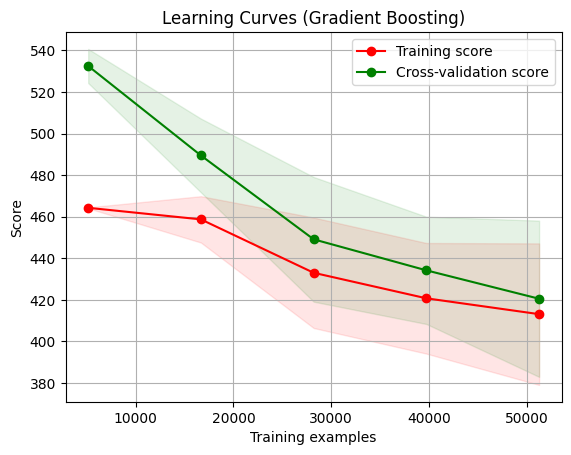

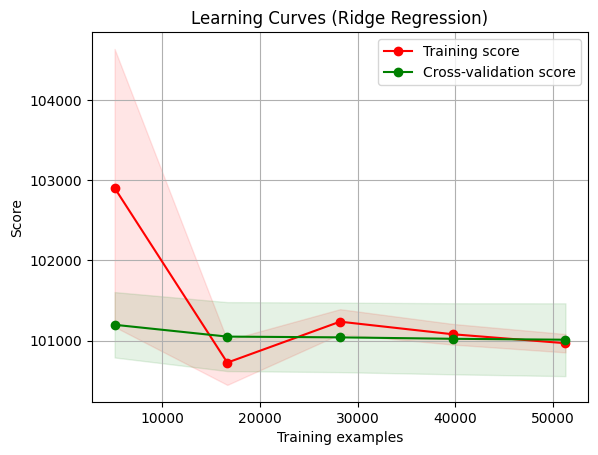

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Fonction de tracé des courbes d'apprentissage
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Modèle Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
plot_learning_curve(gb_model, "Learning Curves (Gradient Boosting)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

# Modèle Ridge Regression
ridge_model = Ridge(alpha=1.0, random_state=42)
plot_learning_curve(ridge_model, "Learning Curves (Ridge Regression)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()


# comparaison des MSE sur les données de test pour chaque modèle

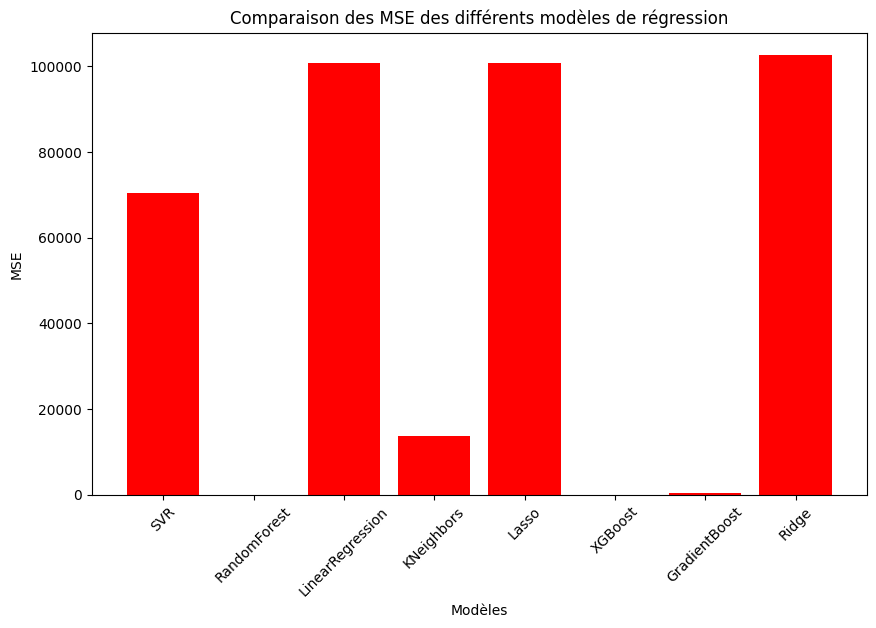

In [ ]:
# Supposons que vous ayez les MSE pour chaque modèle sous forme de liste
mse_scores = [70486.28812259196, 0.021807888514916933, 100880.47818812334, 13731.79467871958, 100895.0095572846, 31.178801647374797, 478.1645475941457, 102751.47940179518]
model_names = ["SVR", "RandomForest", "LinearRegression", "KNeighbors", "Lasso", "XGBoost", "GradientBoost", "Ridge"]

# Afficher les MSE sur un histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='Red')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.title('Comparaison des MSE des différents modèles de régression')
plt.xticks(rotation=45)
plt.show()

# comparaison des MAE sur les données de test pour chaque modèle

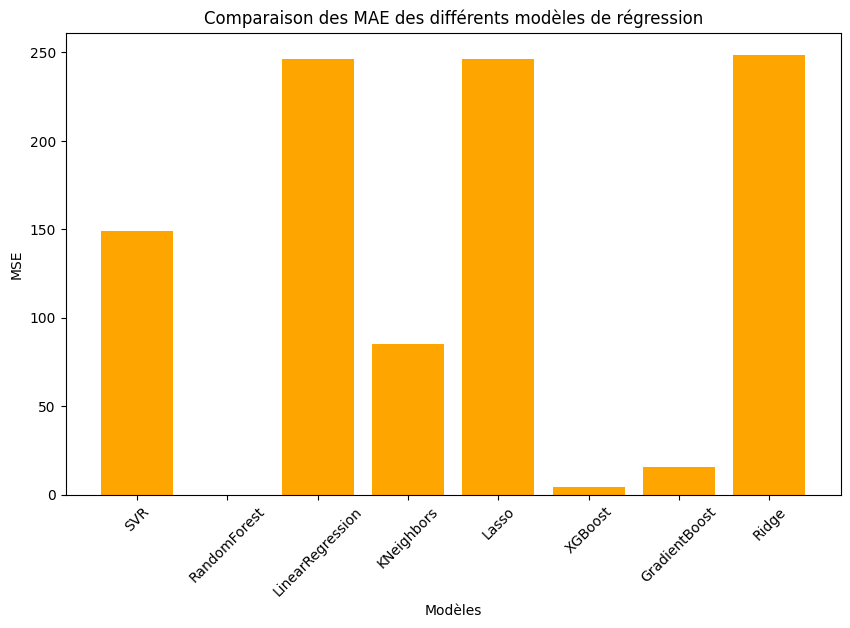

In [ ]:
# Supposons que vous ayez les MSE pour chaque modèle sous forme de liste
mae_scores = [149.01114854975563, 0.09978380132285901, 246.22367573773278, 85.10365156620492, 246.23855437216395, 4.137880991918235, 15.812760410369595, 248.7460752055102]
model_names = ["SVR", "RandomForest", "LinearRegression", "KNeighbors", "Lasso", "XGBoost", "GradientBoost", "Ridge"]

# Afficher les MSE sur un histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores, color='orange')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.title('Comparaison des MAE des différents modèles de régression')
plt.xticks(rotation=45)
plt.show()

# Comparaison des scores sur les données de test pour chaque modèle

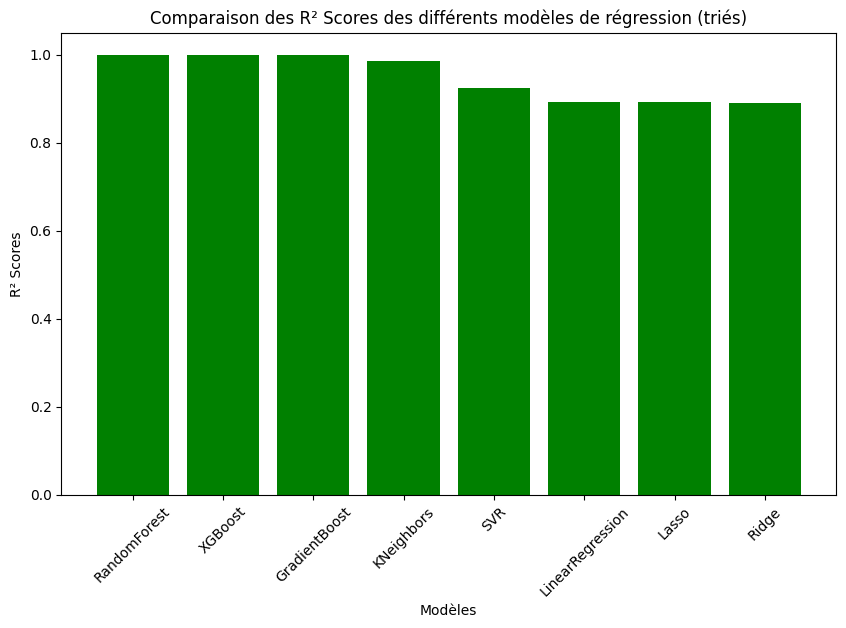

In [ ]:
# Supposons que vous ayez les scores R² pour chaque modèle sous forme de liste
R2_scores = [0.9243425848609487, 0.9999999766972174, 0.8917185679513946, 0.9852607915910511,
             0.89170297050885, 0.9999665338095876, 0.9994851328839295, 0.8893616054603778]
model_names = ["SVR", "RandomForest", "LinearRegression", "KNeighbors", "Lasso", "XGBoost", "GradientBoost", "Ridge"]

# Associer les scores aux noms des modèles
models_and_scores = list(zip(R2_scores, model_names))

# Trier les modèles par scores R² décroissants
sorted_models_and_scores = sorted(models_and_scores, reverse=True, key=lambda x: x[0])

# Séparer les scores et les noms des modèles triés
sorted_R2_scores, sorted_model_names = zip(*sorted_models_and_scores)

# Afficher les scores R² triés sur un histogramme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_R2_scores, color='green')
plt.xlabel('Modèles')
plt.ylabel('R² Scores')
plt.title('Comparaison des R² Scores des différents modèles de régression (triés)')
plt.xticks(rotation=45)
plt.show()

## Effectuons un tri a plat pour chacune des variables

Un tri à plat, également appelé tableau de fréquences ou tableau de contingence, est une méthode de présentation des données qui consiste à compter le nombre d'occurrences de chaque valeur unique dans un ensemble de données.

L'objectif principal d'un tri à plat est de résumer la distribution des valeurs d'une variable qualitative ou discrète. Cela permet de visualiser rapidement la répartition des différentes catégories ou modalités d'une variable et de repérer les valeurs les plus fréquentes.

In [ ]:
# Initialiser un dictionnaire pour stocker les résultats
results = {}

# Calculer les fréquences pour chaque variable
variables = ['Âge', 'Sexe', 'Catégorie de produit acheté', 'Prix du produit', 'Quantité', 'Canal d\'achat', 'Engagement sur les réseaux sociaux', 'depense_totale']

for variable in variables:
    frequency = df[variable].value_counts().sort_index()
    results[variable] = frequency

# Créer un tableau de fréquences pour chaque variable et les afficher
for variable, frequency in results.items():
    print(f"\nFréquence pour {variable}:\n")
    print(frequency)
    print('-' * 40)


Fréquence pour Âge:

Âge
18    1453
19    1484
20    1426
21    1458
22    1423
23    1340
24    1563
25    1548
26    1494
27    1747
28    1601
29    1372
30    1592
31    1533
32    1419
33    1566
34    1546
35    1540
36    1453
37    1364
38    1520
39    1646
40    1597
41    1733
42    1514
43    1582
44    1640
45    1516
46    1797
47    1475
48    1641
49    1441
50    1520
51    1595
52    1743
53    1545
54    1552
55    1478
56    1585
57    1443
58    1507
59    1713
60    1668
61    1467
62    1439
63    1709
64    1515
65    1369
66    1565
67    1548
68    1703
69    1441
Name: count, dtype: int64
----------------------------------------

Fréquence pour Sexe:

Sexe
Femme    39168
Homme    40961
Name: count, dtype: int64
----------------------------------------

Fréquence pour Catégorie de produit acheté:

Catégorie de produit acheté
Alimentation    16106
Jouets          15949
Maison          15920
Vêtements       16119
Électronique    16035
Name: count, dtype: int64
